Python 3.6.5

# Spotify Data And Google Trends Notebook

This notebook will explore the relationship between Spotify metrics and the popularity of the songs as recorded by Google trends information. 

Spotify dataset: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks \
Google Trends Reference: https://github.com/Tanu-N-Prabhu/Python/blob/master/Google_Trends_API.ipynb 



The Spotify data 'data.csv' contains more than 175,000 songs collected from Spotify's API (March 30th 2021).
The features in the data set are described below.

Primary:
- id (Id of track generated by Spotify)

Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

The data comes in different formats. Grouped by artirst, year, and genre.

Importing Datasets :

- data.csv
- data_by_artist.csv
- data_by_genres.csv
- data_by_year.csv
- data_w_genres.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set(style="whitegrid")
sns.set(font_scale=1.4)
plt.style.use("default")

# Data Import and Introductory Information

In [4]:
data = pd.read_csv('data.csv')
data_by_year = pd.read_csv('data_by_year.csv')
data_by_artist = pd.read_csv('data_by_artist.csv')
data_by_genre = pd.read_csv('data_by_genres.csv')
data_w_genre = pd.read_csv('data_w_genres.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [6]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [7]:
data.describe().round(decimals=2)

acousticness  danceability  duration_ms     energy   explicit  \
count     174389.00     174389.00    174389.00  174389.00  174389.00   
mean           0.50          0.54    232810.03       0.48       0.07   
std            0.38          0.18    148395.80       0.27       0.25   
min            0.00          0.00      4937.00       0.00       0.00   
25%            0.09          0.41    166133.00       0.25       0.00   
50%            0.52          0.55    205787.00       0.46       0.00   
75%            0.90          0.67    265720.00       0.71       0.00   
max            1.00          0.99   5338302.00       1.00       1.00   

       instrumentalness        key   liveness   loudness       mode  \
count         174389.00  174389.00  174389.00  174389.00  174389.00   
mean               0.20       5.21       0.21     -11.75       0.70   
std                0.33       3.52       0.18       5.69       0.46   
min                0.00       0.00       0.00     -60.00       0.00   
25%                0.00       2.00       0.10     -14.91       0.00   
50%                0.00       5.00       0.14     -10.84       1.00   
75%                0.25       8.00       0.27      -7.50       1.00   
max                1.00      11.00       1.00       3.86       1.00   

       popularity  speechiness      tempo    valence       year  
count   174389.00    174389.00  174389.00  174389.00  174389.00  
mean        25.69         0.11     117.01       0.52    1977.06  
std         21.87         0.18      30.25       0.26      26.91  
min          0.00         0.00       0.00       0.00    1920.00  
25%          1.00         0.04      93.93       0.31    1955.00  
50%         25.00         0.05     115.82       0.54    1977.00  
75%         42.00         0.08     135.01       0.74    1999.00  
max        100.00         0.97     243.51       1.00    2021.00

In [7]:
display(data)

acousticness                             artists  danceability  \
0           0.991000                     ['Mamie Smith']         0.598   
1           0.643000           ["Screamin' Jay Hawkins"]         0.852   
2           0.993000                     ['Mamie Smith']         0.647   
3           0.000173                 ['Oscar Velazquez']         0.730   
4           0.295000                            ['Mixe']         0.704   
...              ...                                 ...           ...   
174384      0.009170  ['DJ Combo', 'Sander-7', 'Tony T']         0.792   
174385      0.795000                    ['Alessia Cara']         0.429   
174386      0.806000                       ['Roger Fly']         0.671   
174387      0.920000                    ['Taylor Swift']         0.462   
174388      0.239000                       ['Roger Fly']         0.677   

        duration_ms  energy  explicit                      id  \
0            168333   0.224         0  0cS0A1fUEUd1EW3FcF8AEI   
1            150200   0.517         0  0hbkKFIJm7Z05H8Zl9w30f   
2            163827   0.186         0  11m7laMUgmOKqI3oYzuhne   
3            422087   0.798         0  19Lc5SfJJ5O1oaxY0fpwfh   
4            165224   0.707         1  2hJjbsLCytGsnAHfdsLejp   
...             ...     ...       ...                     ...   
174384       147615   0.866         0  46LhBf6TvYjZU2SMvGZAbn   
174385       144720   0.211         0  7tue2Wemjd0FZzRtDrQFZd   
174386       218147   0.589         0  48Qj61hOdYmUCFJbpQ29Ob   
174387       244000   0.240         1  1gcyHQpBQ1lfXGdhZmWrHP   
174388       197710   0.460         0  57tgYkWQTNHVFEt6xDKKZj   

        instrumentalness  key  liveness  loudness  mode  \
0               0.000522    5    0.3790   -12.628     0   
1               0.026400    5    0.0809    -7.261     0   
2               0.000018    0    0.5190   -12.098     1   
3               0.801000    2    0.1280    -7.311     1   
4               0.000246   10    0.4020    -6.036     0   
...                  ...  ...       ...       ...   ...   
174384          0.000060    6    0.1780    -5.089     0   
174385          0.000000    4    0.1960   -11.665     1   
174386          0.920000    4    0.1130   -12.393     0   
174387          0.000000    0    0.1130   -12.077     1   
174388          0.891000    7    0.2150   -12.237     1   

                                                     name  popularity  \
0                                Keep A Song In Your Soul          12   
1                                    I Put A Spell On You           7   
2                                            Golfing Papa           4   
3       True House Music - Xavier Santos & Carlos Gomi...          17   
4                                               Xuniverxe           2   
...                                                   ...         ...   
174384                                            The One           0   
174385                                      A Little More           0   
174386                                           Together           0   
174387                                 champagne problems          69   
174388                                     Improvisations           0   

       release_date  speechiness    tempo  valence  year  
0              1920       0.0936  149.976   0.6340  1920  
1        1920-01-05       0.0534   86.889   0.9500  1920  
2              1920       0.1740   97.600   0.6890  1920  
3        1920-01-01       0.0425  127.997   0.0422  1920  
4        1920-10-01       0.0768  122.076   0.2990  1920  
...             ...          ...      ...      ...   ...  
174384   2020-12-25       0.0356  125.972   0.1860  2020  
174385   2021-01-22       0.0360   94.710   0.2280  2021  
174386   2020-12-09       0.0282  108.058   0.7140  2020  
174387   2021-01-07       0.0377  171.319   0.3200  2021  
174388   2020-12-09       0.0258  112.208   0.7470  2020  

[174389 rows x 19 columns]

# Data Set Visualizations

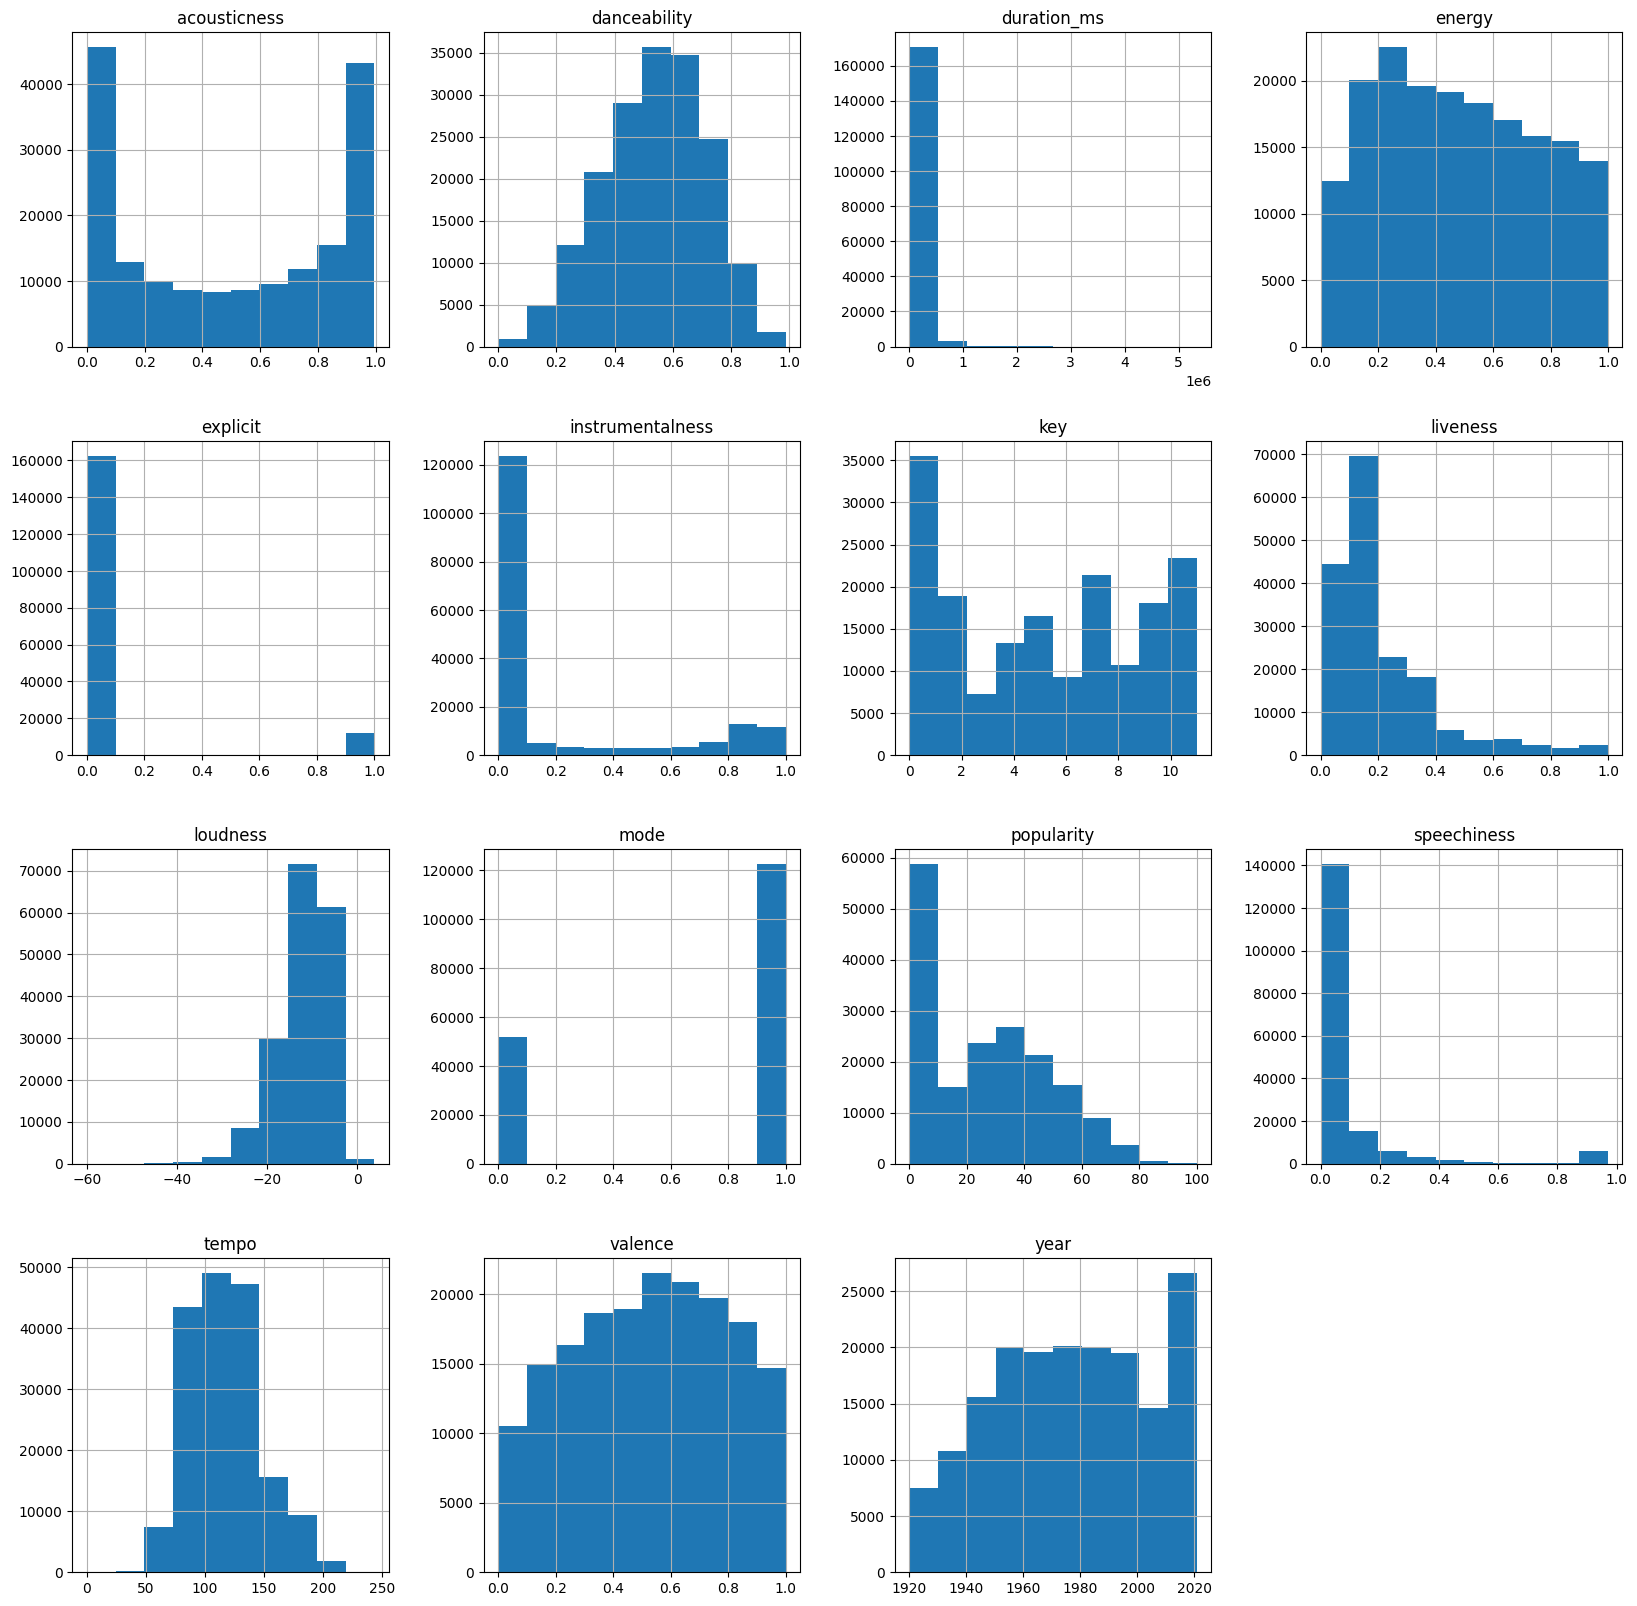

In [8]:
data.hist(figsize=(20, 20))
plt.show()

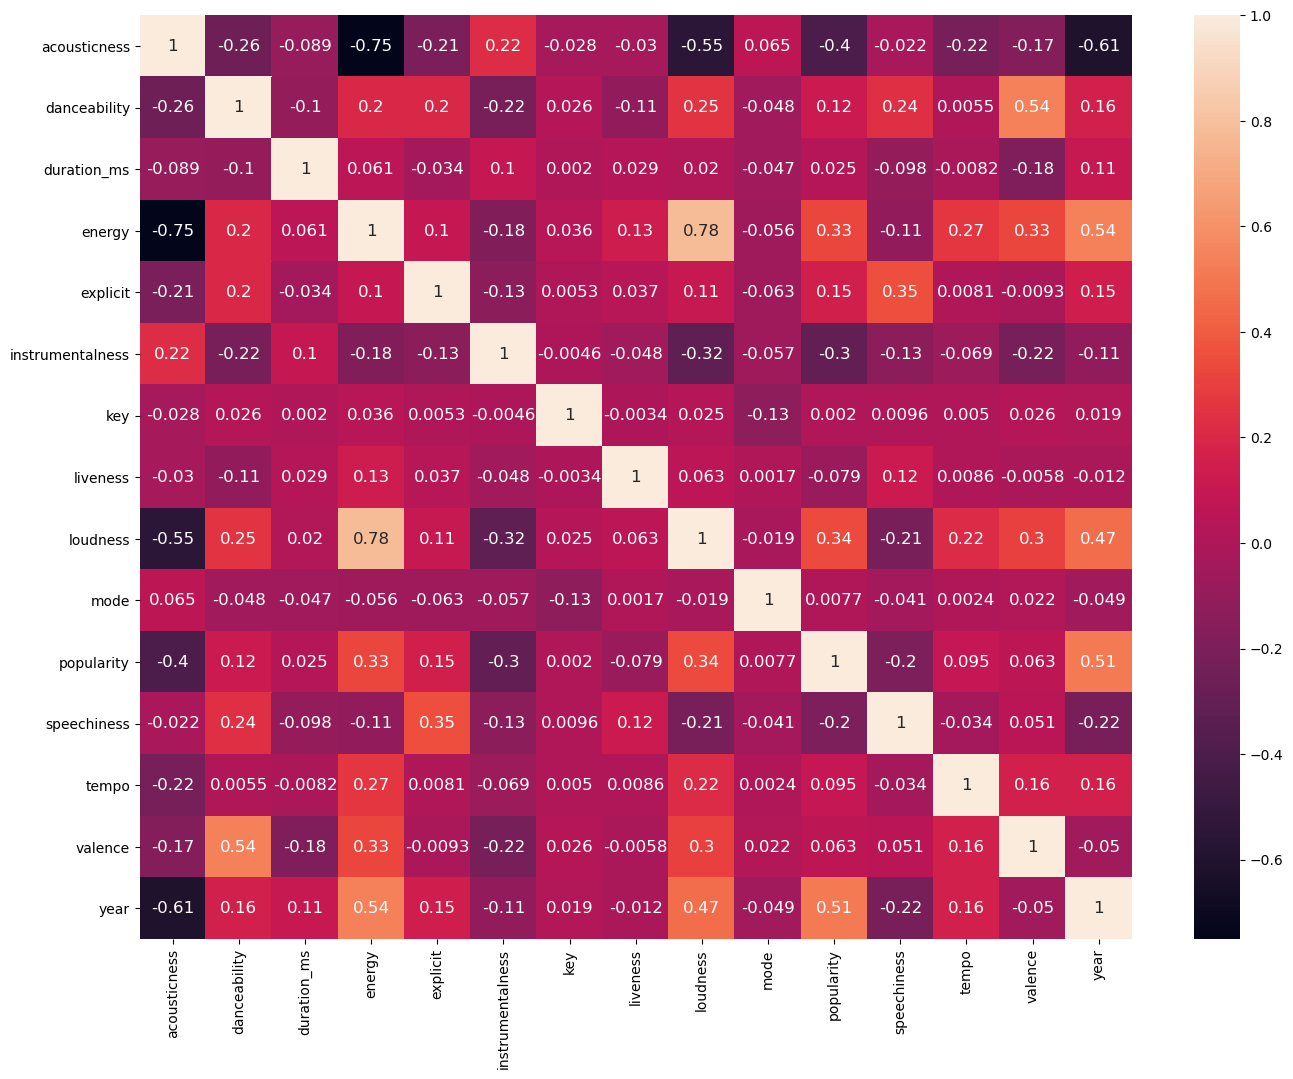

acousticness  danceability  duration_ms    energy  explicit  \
acousticness          1.000000     -0.263217    -0.089169 -0.750852 -0.208176   
danceability         -0.263217      1.000000    -0.100757  0.204838  0.200842   
duration_ms          -0.089169     -0.100757     1.000000  0.060516 -0.033808   
energy               -0.750852      0.204838     0.060516  1.000000  0.102561   
explicit             -0.208176      0.200842    -0.033808  0.102561  1.000000   
instrumentalness      0.221956     -0.215589     0.103621 -0.177750 -0.130609   
key                  -0.028028      0.026266     0.002020  0.035780  0.005282   
liveness             -0.029654     -0.110033     0.028942  0.134815  0.037288   
loudness             -0.546639      0.249541     0.019791  0.779267  0.106249   
mode                  0.064633     -0.048358    -0.046849 -0.056160 -0.062503   
popularity           -0.396744      0.123746     0.024717  0.328939  0.152545   
speechiness          -0.022437      0.239962    -0.097838 -0.112616  0.353872   
tempo                -0.223840      0.005479    -0.008182  0.266448  0.008075   
valence              -0.166968      0.536713    -0.183199  0.326418 -0.009275   
year                 -0.607515      0.159095     0.105661  0.540850  0.151619   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.221956 -0.028028 -0.029654 -0.546639  0.064633   
danceability             -0.215589  0.026266 -0.110033  0.249541 -0.048358   
duration_ms               0.103621  0.002020  0.028942  0.019791 -0.046849   
energy                   -0.177750  0.035780  0.134815  0.779267 -0.056160   
explicit                 -0.130609  0.005282  0.037288  0.106249 -0.062503   
instrumentalness          1.000000 -0.004619 -0.047941 -0.317562 -0.056731   
key                      -0.004619  1.000000 -0.003368  0.025227 -0.127397   
liveness                 -0.047941 -0.003368  1.000000  0.062695  0.001677   
loudness                 -0.317562  0.025227  0.062695  1.000000 -0.019250   
mode                     -0.056731 -0.127397  0.001677 -0.019250  1.000000   
popularity               -0.300625  0.001951 -0.078959  0.337194  0.007652   
speechiness              -0.133966  0.009648  0.122034 -0.213504 -0.040711   
tempo                    -0.068656  0.005009  0.008586  0.217914  0.002438   
valence                  -0.219188  0.025592 -0.005781  0.302520  0.021592   
year                     -0.114259  0.019194 -0.011852  0.465189 -0.048922   

                  popularity  speechiness     tempo   valence      year  
acousticness       -0.396744    -0.022437 -0.223840 -0.166968 -0.607515  
danceability        0.123746     0.239962  0.005479  0.536713  0.159095  
duration_ms         0.024717    -0.097838 -0.008182 -0.183199  0.105661  
energy              0.328939    -0.112616  0.266448  0.326418  0.540850  
explicit            0.152545     0.353872  0.008075 -0.009275  0.151619  
instrumentalness   -0.300625    -0.133966 -0.068656 -0.219188 -0.114259  
key                 0.001951     0.009648  0.005009  0.025592  0.019194  
liveness           -0.078959     0.122034  0.008586 -0.005781 -0.011852  
loudness            0.337194    -0.213504  0.217914  0.302520  0.465189  
mode                0.007652    -0.040711  0.002438  0.021592 -0.048922  
popularity          1.000000    -0.195329  0.094985  0.063471  0.513227  
speechiness        -0.195329     1.000000 -0.033530  0.050600 -0.215630  
tempo               0.094985    -0.033530  1.000000  0.163118  0.161729  
valence             0.063471     0.050600  0.163118  1.000000 -0.049578  
year                0.513227    -0.215630  0.161729 -0.049578  1.000000

In [8]:
plt.figure(figsize=(16, 12))
corr = data.corr()
CM = sns.heatmap(corr,annot=True,annot_kws={"size": 12})
plt.show()
corr

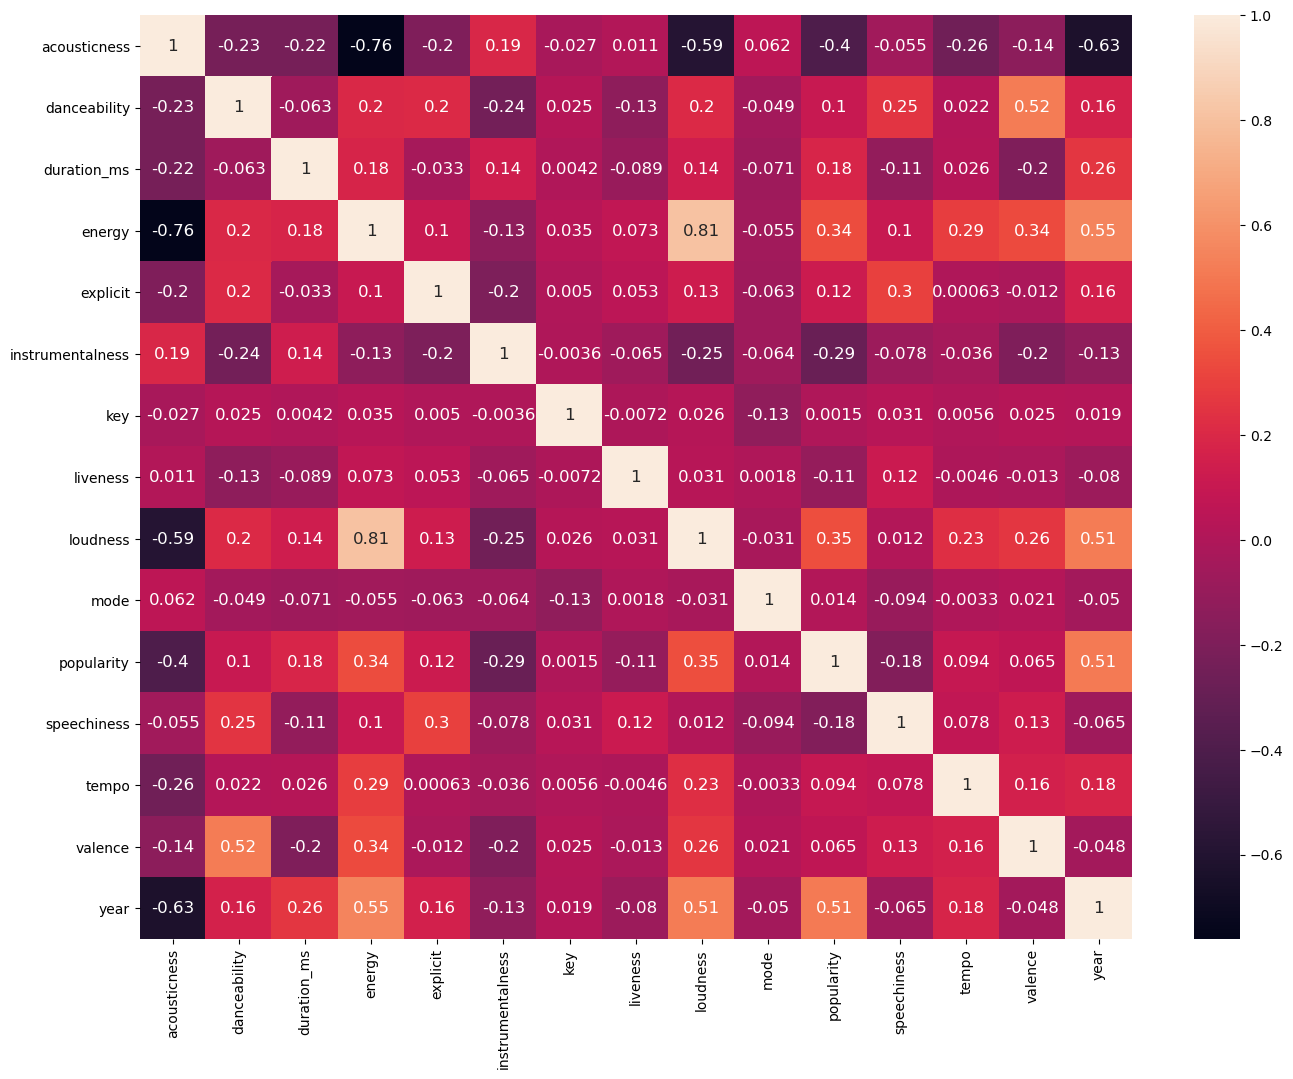

acousticness  danceability  duration_ms    energy  explicit  \
acousticness          1.000000     -0.228375    -0.224872 -0.761150 -0.196704   
danceability         -0.228375      1.000000    -0.063275  0.200086  0.203177   
duration_ms          -0.224872     -0.063275     1.000000  0.178390 -0.033255   
energy               -0.761150      0.200086     0.178390  1.000000  0.101960   
explicit             -0.196704      0.203177    -0.033255  0.101960  1.000000   
instrumentalness      0.194350     -0.238385     0.136720 -0.131763 -0.203598   
key                  -0.026626      0.024832     0.004175  0.035079  0.005025   
liveness              0.011428     -0.129079    -0.088626  0.072922  0.053050   
loudness             -0.585290      0.203365     0.136663  0.812983  0.126325   
mode                  0.061574     -0.049432    -0.071148 -0.055022 -0.062503   
popularity           -0.397944      0.100034     0.184780  0.339710  0.122644   
speechiness          -0.055069      0.250404    -0.110153  0.103705  0.299504   
tempo                -0.256891      0.022051     0.026359  0.287201  0.000628   
valence              -0.139795      0.517208    -0.195107  0.336630 -0.012404   
year                 -0.628840      0.163288     0.259348  0.547044  0.157948   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.194350 -0.026626  0.011428 -0.585290  0.061574   
danceability             -0.238385  0.024832 -0.129079  0.203365 -0.049432   
duration_ms               0.136720  0.004175 -0.088626  0.136663 -0.071148   
energy                   -0.131763  0.035079  0.072922  0.812983 -0.055022   
explicit                 -0.203598  0.005025  0.053050  0.126325 -0.062503   
instrumentalness          1.000000 -0.003619 -0.064512 -0.250719 -0.063989   
key                      -0.003619  1.000000 -0.007232  0.026268 -0.125543   
liveness                 -0.064512 -0.007232  1.000000  0.030930  0.001771   
loudness                 -0.250719  0.026268  0.030930  1.000000 -0.031433   
mode                     -0.063989 -0.125543  0.001771 -0.031433  1.000000   
popularity               -0.285806  0.001498 -0.107001  0.350080  0.014113   
speechiness              -0.078080  0.031282  0.118089  0.012220 -0.093835   
tempo                    -0.036357  0.005641 -0.004623  0.225935 -0.003299   
valence                  -0.197019  0.025186 -0.013433  0.261363  0.021003   
year                     -0.125615  0.019330 -0.080009  0.514027 -0.050446   

                  popularity  speechiness     tempo   valence      year  
acousticness       -0.397944    -0.055069 -0.256891 -0.139795 -0.628840  
danceability        0.100034     0.250404  0.022051  0.517208  0.163288  
duration_ms         0.184780    -0.110153  0.026359 -0.195107  0.259348  
energy              0.339710     0.103705  0.287201  0.336630  0.547044  
explicit            0.122644     0.299504  0.000628 -0.012404  0.157948  
instrumentalness   -0.285806    -0.078080 -0.036357 -0.197019 -0.125615  
key                 0.001498     0.031282  0.005641  0.025186  0.019330  
liveness           -0.107001     0.118089 -0.004623 -0.013433 -0.080009  
loudness            0.350080     0.012220  0.225935  0.261363  0.514027  
mode                0.014113    -0.093835 -0.003299  0.021003 -0.050446  
popularity          1.000000    -0.177062  0.093907  0.065036  0.507497  
speechiness        -0.177062     1.000000  0.077948  0.131445 -0.065136  
tempo               0.093907     0.077948  1.000000  0.158840  0.179764  
valence             0.065036     0.131445  0.158840  1.000000 -0.048043  
year                0.507497    -0.065136  0.179764 -0.048043  1.000000

In [9]:
plt.figure(figsize=(16, 12))
corr = data.corr(method = 'spearman')
CM = sns.heatmap(corr,annot=True,annot_kws={"size": 12})
plt.show()
corr

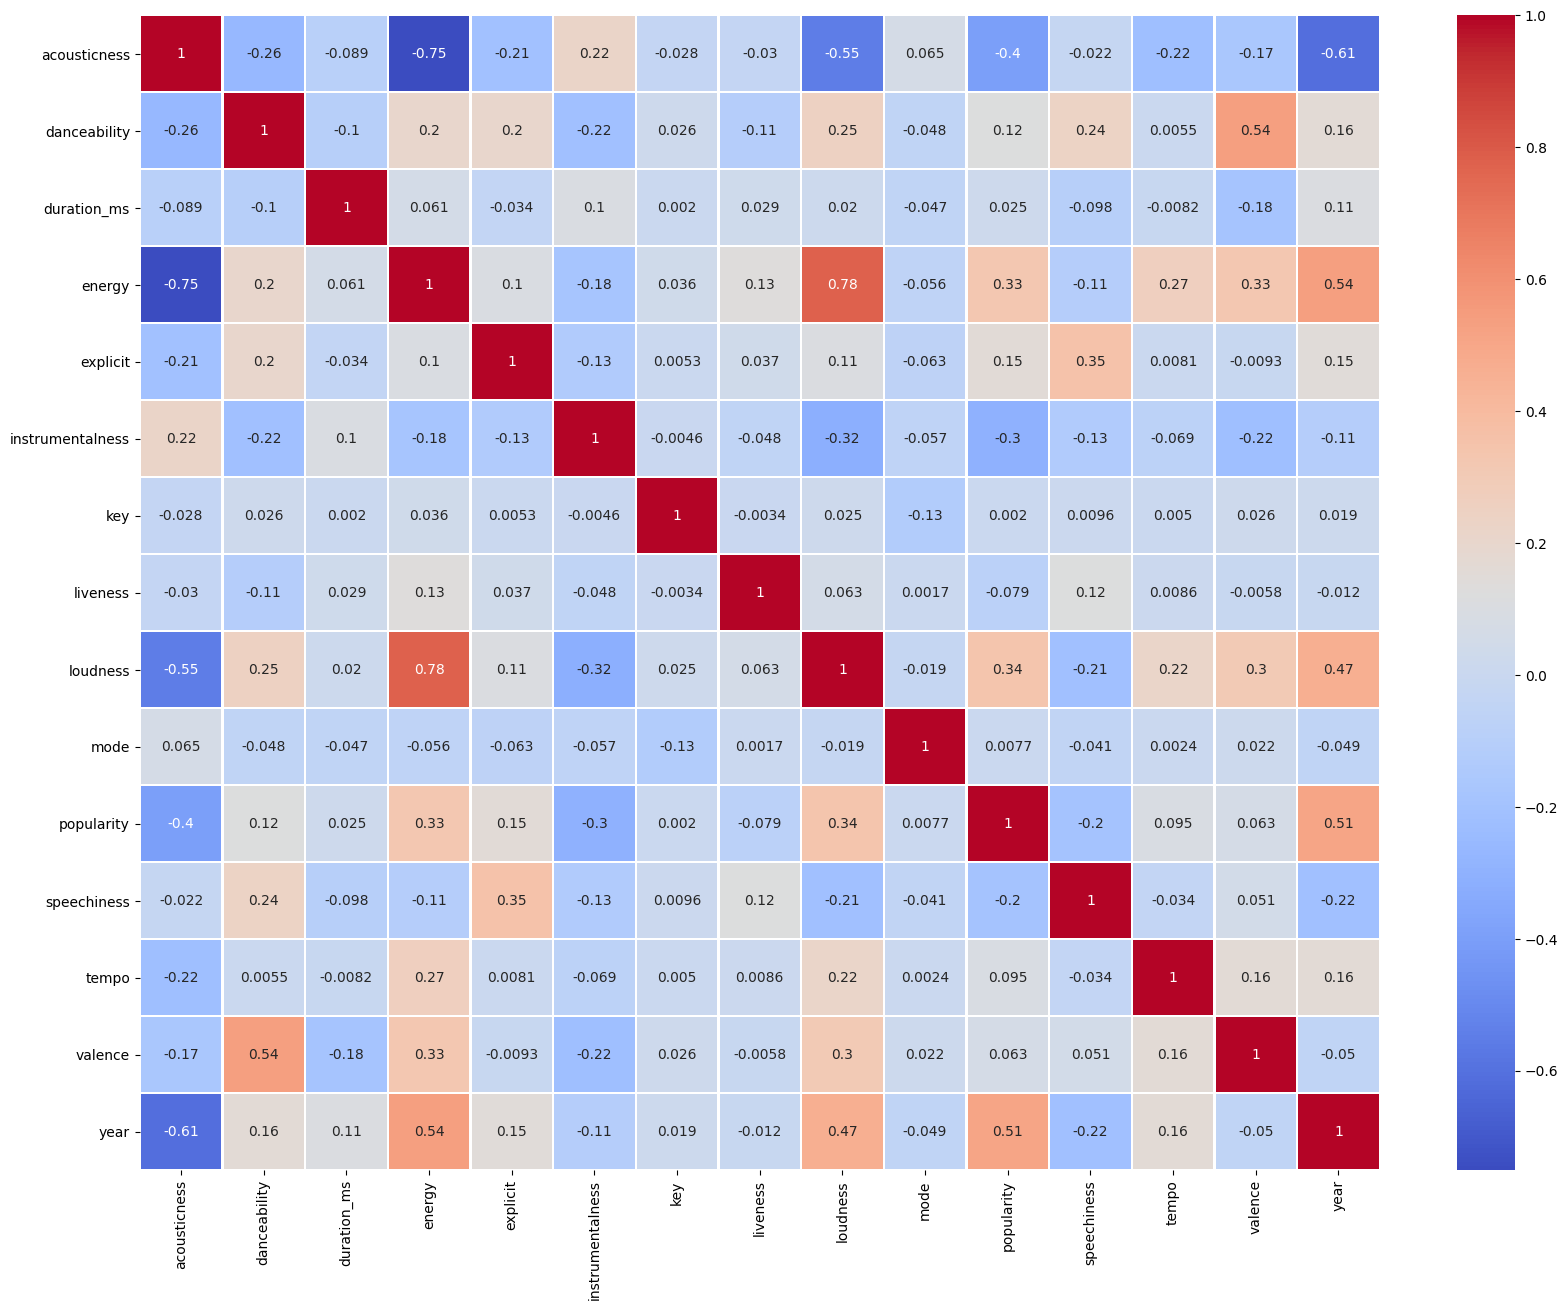

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),linecolor='white',linewidths=1,cmap='coolwarm',annot=True)
plt.show()

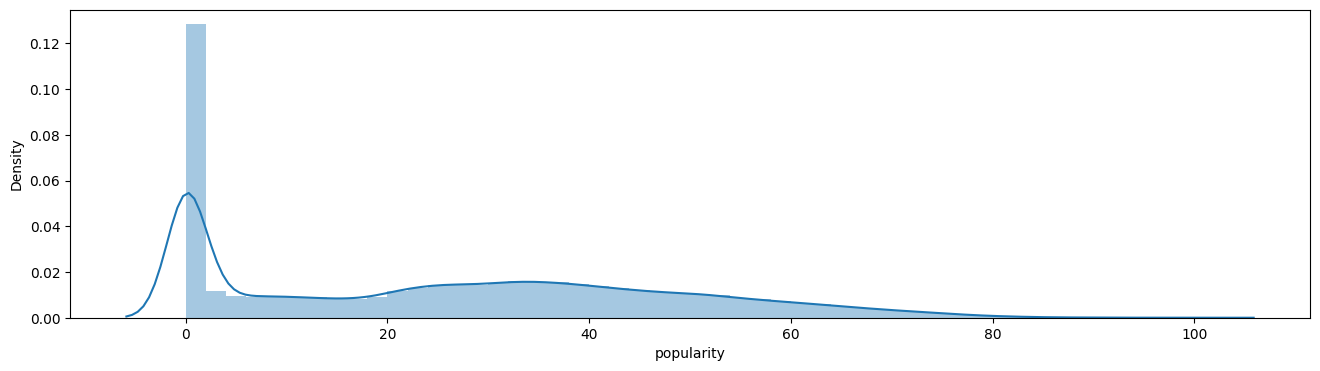

In [11]:
plt.figure(figsize=(16, 4))
sns.distplot(data["popularity"])
plt.show()


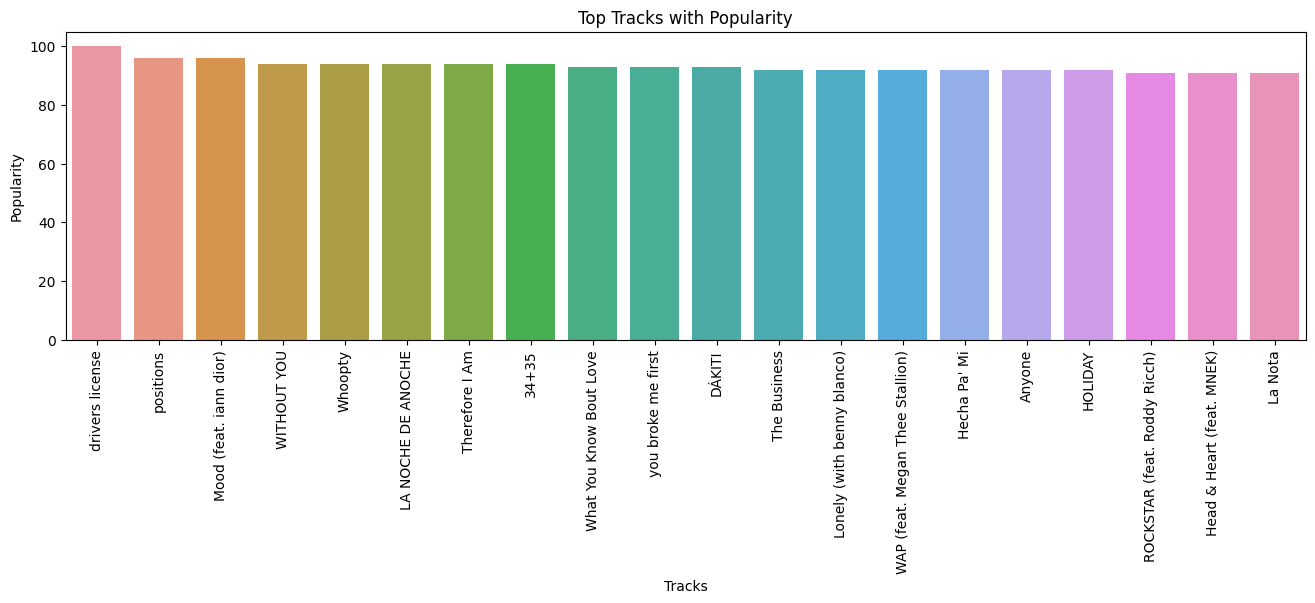

In [12]:
plt.figure(figsize=(16, 4))
x = data.groupby("name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x)
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)
plt.show()

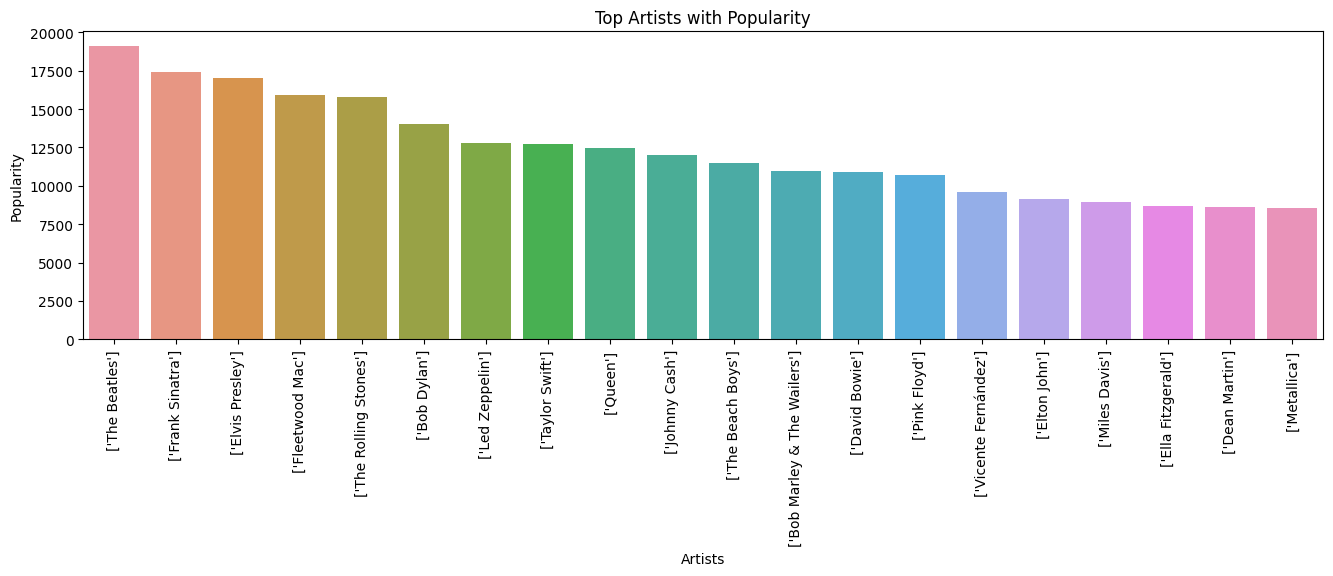

In [13]:
plt.figure(figsize=(16, 4))
x = data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)
plt.show()

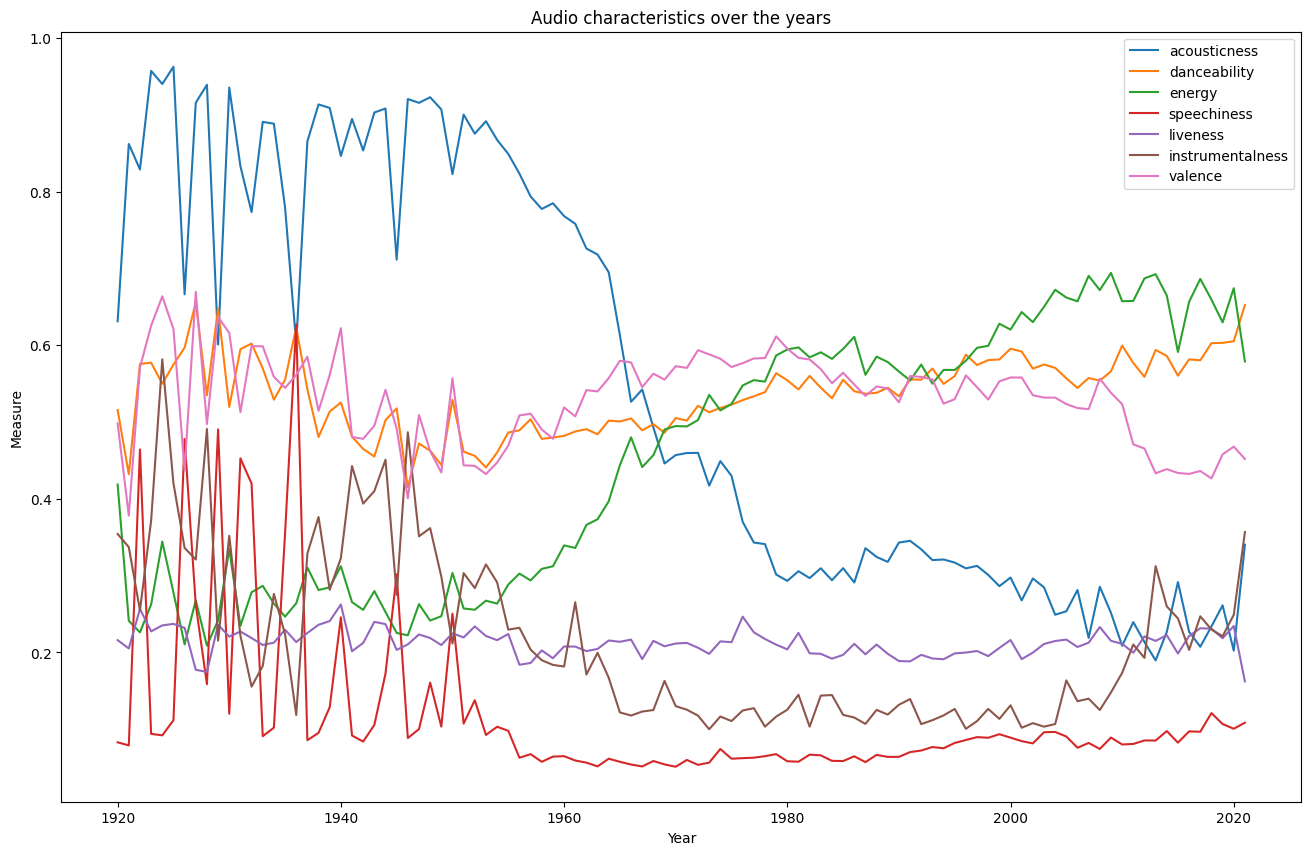

In [14]:
plt.figure(figsize=(16, 10))
columns = ["acousticness","danceability","energy","speechiness","liveness",'instrumentalness','valence']
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over the years')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.show()

# Google Trends API for Python: PyTrends

Google trends is a website that records, analyzes and lists popular search results on Google. Trends data can be analyze over time, by region, and by type of search. The trending data is available after 2004 until present and is freely available from Google. The API I will use is an unofficial API that is opensource. Requests to the trending information is rate limited by Google. The rate limit is not currently known. A safe estimate would be roughly 1500 requests per day. The values from Google come normalized as values between 0 and 100. 

Link: https://trends.google.com  \
API: https://pypi.org/project/pytrends/

# Setup PyTrends

In [10]:
!pip install pytrends

In [11]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=300, timeout=(10,25), retries=2, backoff_factor=0.1, requests_args={'verify':False})

In [12]:
kw_list = ["canada", "time", "Spotify","ethereum","music"] # build search item list (5 at a time limit)
# build payload and specify keywords, no category, all time from 2004 forward and US region
pytrends.build_payload(kw_list, cat=None, timeframe='all', geo='US')
# Pull the interest over time data (one of many possible requests like trending, top charts, suggestions)
google_trends = pytrends.interest_over_time()

In [13]:
google_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2004-01-01 to 2021-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   canada     209 non-null    int32
 1   time       209 non-null    int32
 2   Spotify    209 non-null    int32
 3   ethereum   209 non-null    int32
 4   music      209 non-null    int32
 5   isPartial  209 non-null    bool 
dtypes: bool(1), int32(5)
memory usage: 5.9 KB


In [19]:
google_trends.describe()

canada        time     Spotify    ethereum       music
count  208.000000  208.000000  208.000000  208.000000  208.000000
mean     9.822115   64.966346    2.581731    0.139423   47.961538
std      2.861048   13.814989    2.627071    0.496153   17.136521
min      6.000000   44.000000    0.000000    0.000000   23.000000
25%      7.000000   51.750000    0.000000    0.000000   34.000000
50%      9.000000   66.000000    2.000000    0.000000   42.000000
75%     12.000000   78.000000    5.000000    0.000000   60.000000
max     18.000000  100.000000    9.000000    3.000000   92.000000

In [20]:
display(google_trends)

canada  time  Spotify  ethereum  music isPartial
date                                                        
2004-01-01      17    48        0         0     78     False
2004-02-01      15    50        0         0     75     False
2004-03-01      16    48        0         0     75     False
2004-04-01      14    49        0         0     75     False
2004-05-01      16    45        0         0     76     False
...            ...   ...      ...       ...    ...       ...
2020-12-01       7    77        9         1     28     False
2021-01-01       7    78        5         2     23     False
2021-02-01       7    83        6         3     25     False
2021-03-01       6    84        5         2     24     False
2021-04-01       6    78        6         3     24      True

[208 rows x 6 columns]

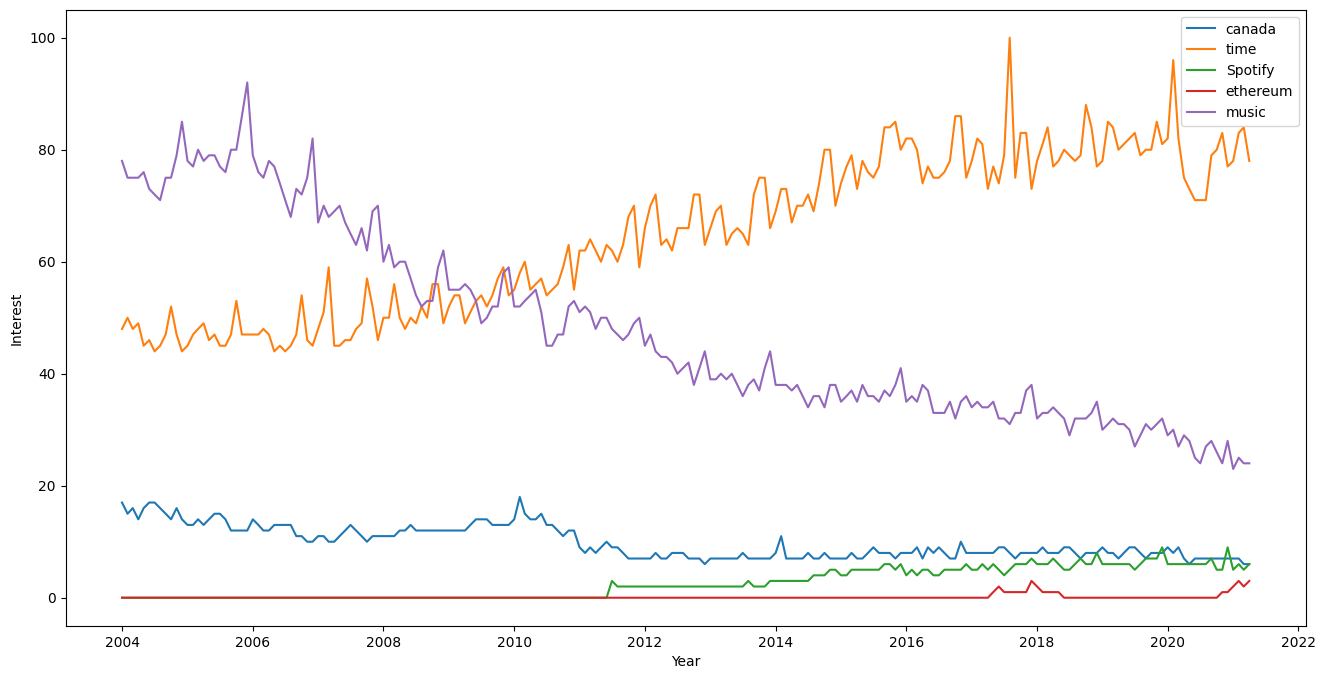

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='date', length=208, freq=None)


In [21]:
time = google_trends.index
plt.figure(figsize=(16, 8))
for item in kw_list:
    plt.plot(time,google_trends["{0}".format(item)])
plt.xlabel('Year')
plt.ylabel('Interest')
plt.legend(kw_list)
plt.show()
print(time)

# Analysis: Spotify Metrics and Google Trends

This section will combine the Spotify metrics dataset will information pulled from Google trends. The goal is look for correlations between Spotify metrics and Google trends data. A motivation would be predicting which songs might become popular. I will restrict myself to the 'interest over time' data from Google trends. The Spotify data format differs from the Google trends interest over time data format. The Spotify data set is a snapshot in time (2021) of each songs popularity and a rating of the songs characteristics. While the trends data is the search popularity over many years. 

Considerations:
- Rate limited by Google, only request 5 at a time and limited number of requests
- Google trends data is normalize to highest value in payload
- Spotify data doesn't format well with trends data
- Much of Spotify data is not useful, low popularity songs may be disregarded

In [22]:
raw_data = data.copy() # copy the data

In [23]:
data=raw_data

# Preprocessing

In [24]:
unwanted = ['key','mode','explicit','id','artists','name','release_date']
data = data.drop(columns=unwanted)
display(data)

acousticness  danceability  duration_ms  energy  instrumentalness  \
0           0.991000         0.598       168333   0.224          0.000522   
1           0.643000         0.852       150200   0.517          0.026400   
2           0.993000         0.647       163827   0.186          0.000018   
3           0.000173         0.730       422087   0.798          0.801000   
4           0.295000         0.704       165224   0.707          0.000246   
...              ...           ...          ...     ...               ...   
174384      0.009170         0.792       147615   0.866          0.000060   
174385      0.795000         0.429       144720   0.211          0.000000   
174386      0.806000         0.671       218147   0.589          0.920000   
174387      0.920000         0.462       244000   0.240          0.000000   
174388      0.239000         0.677       197710   0.460          0.891000   

        liveness  loudness  popularity  speechiness    tempo  valence  year  
0         0.3790   -12.628          12       0.0936  149.976   0.6340  1920  
1         0.0809    -7.261           7       0.0534   86.889   0.9500  1920  
2         0.5190   -12.098           4       0.1740   97.600   0.6890  1920  
3         0.1280    -7.311          17       0.0425  127.997   0.0422  1920  
4         0.4020    -6.036           2       0.0768  122.076   0.2990  1920  
...          ...       ...         ...          ...      ...      ...   ...  
174384    0.1780    -5.089           0       0.0356  125.972   0.1860  2020  
174385    0.1960   -11.665           0       0.0360   94.710   0.2280  2021  
174386    0.1130   -12.393           0       0.0282  108.058   0.7140  2020  
174387    0.1130   -12.077          69       0.0377  171.319   0.3200  2021  
174388    0.2150   -12.237           0       0.0258  112.208   0.7470  2020  

[174389 rows x 12 columns]

In [25]:
features = [ col for col in data.columns if col!='popularity']
X = data[features]
y = data['popularity']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Preprocess columns by normalizing numerical values between 0 and 1.

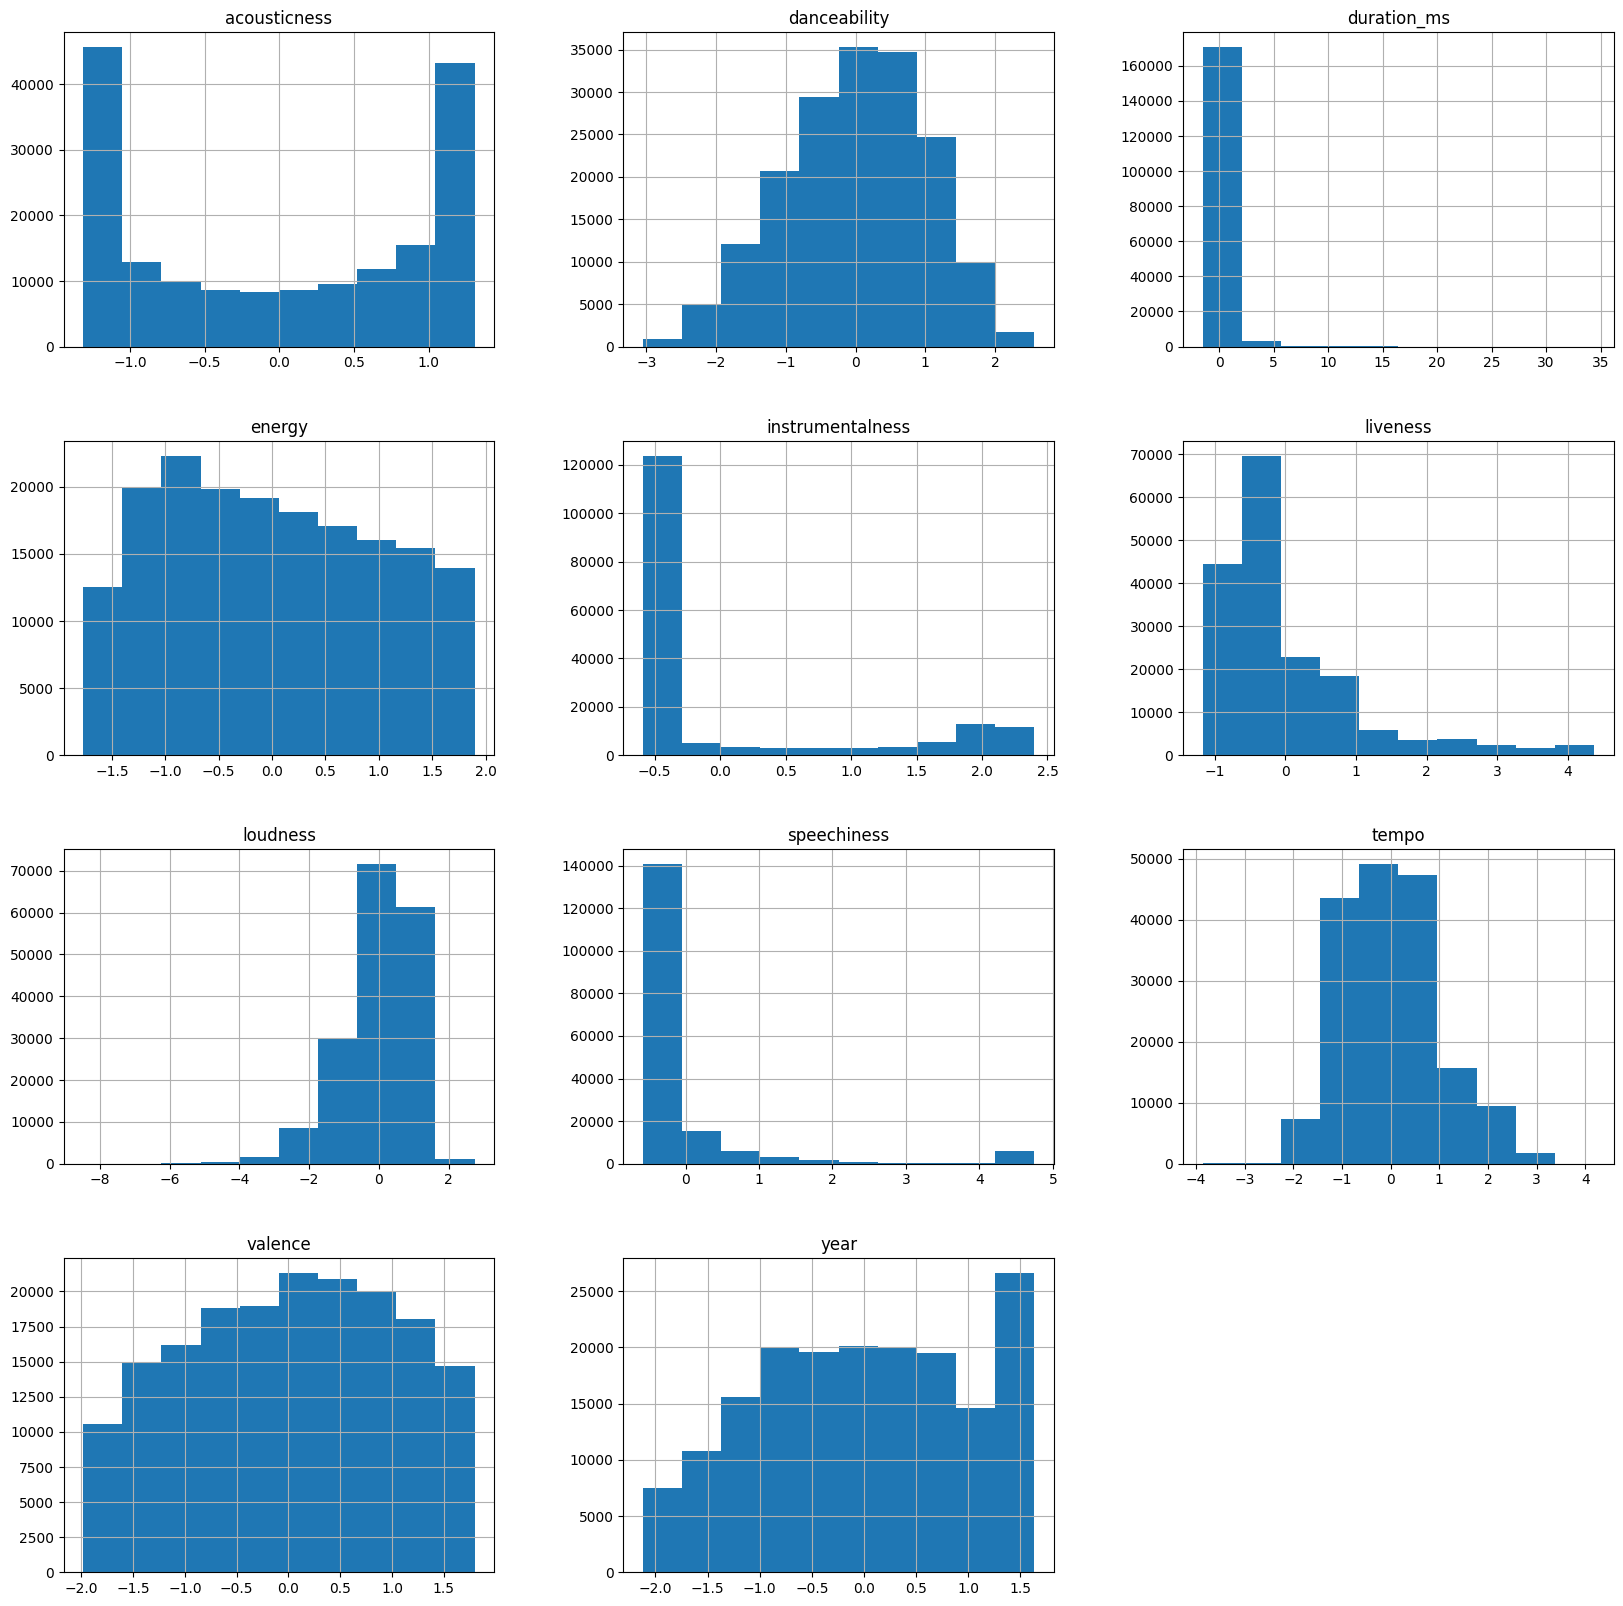

In [27]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X[features] = sc_X.fit_transform(X[features])
y = sc_y.fit_transform(np.array(y).reshape(-1,1))
X.hist(figsize=(20, 20))
plt.show()

Split data into training and testing set with an automatic shuffle. Testing set will be 30% of training set. Predicting popularity based on other metrics.

In [28]:
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

# Spotify Dataset Linear Regression

To begin the analysis we will do a linear regression on the Spotify data to see how effective it is to predict the popularity of a song from its other features using a simple linear model.

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
linear_mod = LinearRegression()
linear_mod.fit(x_train,y_train)
print('R^2 = {0:.4f}'.format(linear_mod.score(x_train,y_train)))

R^2 = 0.3517


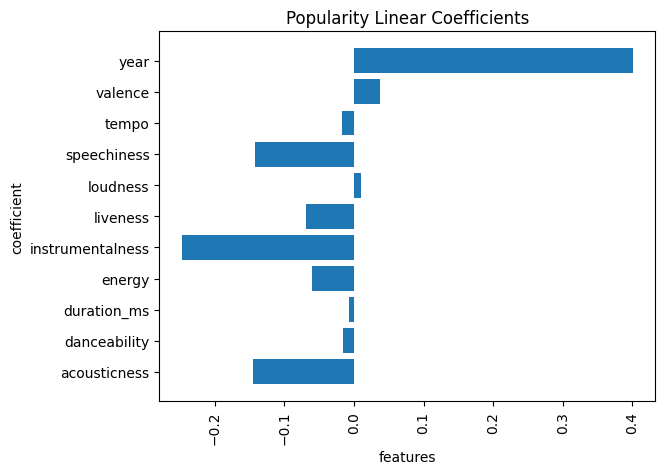

In [38]:
plt.barh(features,linear_mod.coef_[0])
plt.xticks(rotation = 90)
plt.title('Popularity Linear Coefficients')
plt.ylabel('coefficient')
plt.xlabel('features')
plt.show()

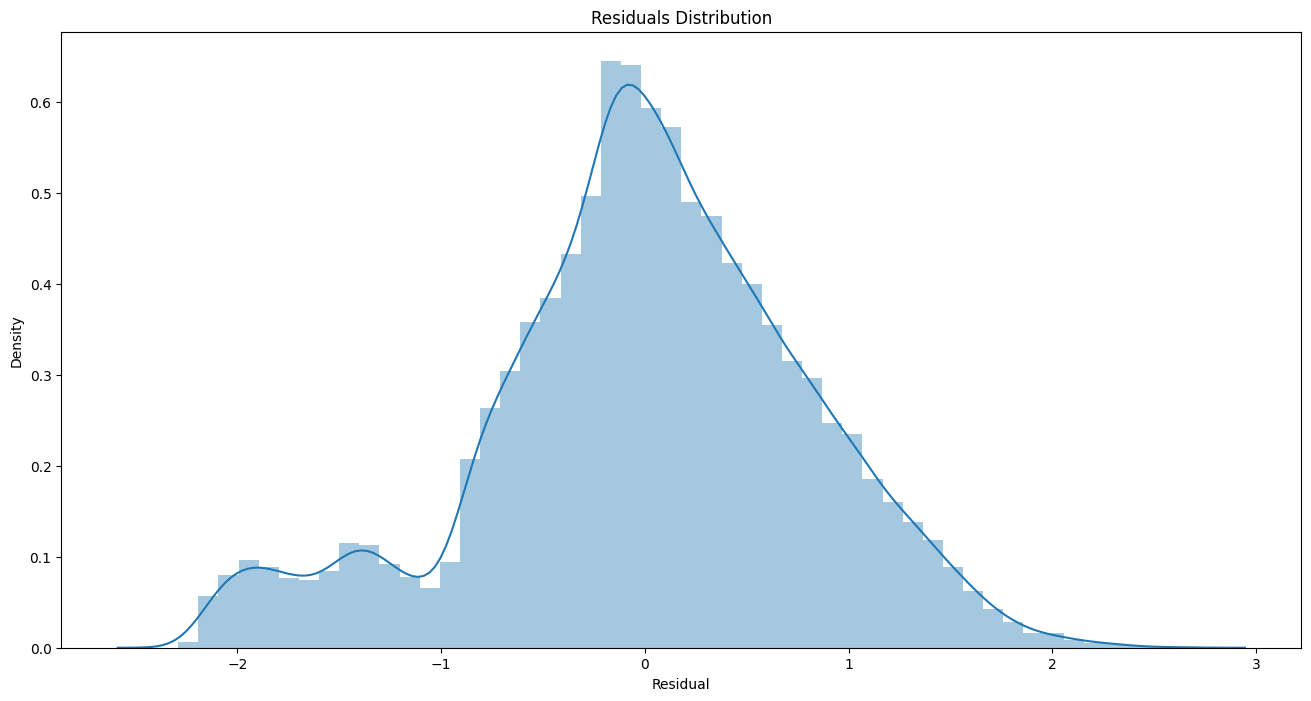

In [39]:
prediction = linear_mod.predict(x_test)
plt.figure(figsize=(16, 8))
sns.distplot(y_test-prediction)
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.show()

In [40]:
from sklearn.metrics import mean_absolute_error,r2_score
print( 'MAE = {0:.4f}'.format(mean_absolute_error(y_test,prediction)))
print( 'R^2 = {0:.4f}'.format(r2_score(y_test,prediction)))

MAE = 0.6158
R^2 = 0.3586


# Polynomial Features

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
model = model.fit(x_train, y_train)

In [42]:
pred = model.predict(x_test)
print( 'MAE = {0:.4f}'.format(mean_absolute_error(y_test,pred)))
print( 'R^2 = {0:.4f}'.format(r2_score(y_test,pred)))

MAE = 0.5351
R^2 = 0.5090


# SVM

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
# Standardize data for SVR
model = make_pipeline(StandardScaler(), SVR(kernel='linear'))

Use only 10000 elements of training set due to time complexity of SVR.

In [44]:
model.fit(x_train[0:10000],y_train[0:10000])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [45]:
pred = model.predict(x_test)
print( 'MAE = {0:.4f}'.format(mean_absolute_error(y_test,pred)))
print( 'R^2 = {0:.4f}'.format(r2_score(y_test,pred)))

MAE = 0.5800
R^2 = 0.2642


# Nearest Neighbours

In [46]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [47]:
pred = neigh.predict(x_test)
print( 'MAE = {0:.4f}'.format(mean_absolute_error(y_test,pred)))
print( 'R^2 = {0:.4f}'.format(r2_score(y_test,pred)))

MAE = 0.4498
R^2 = 0.5759


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model = model.fit(x_train, y_train)

In [49]:
pred = model.predict(x_test)
print( 'MAE = {0:.4f}'.format(mean_absolute_error(y_test,pred)))
print( 'R^2 = {0:.4f}'.format(r2_score(y_test,pred)))

MAE = 0.4824
R^2 = 0.3641


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
pred = random_forest.predict(x_test)
print( 'MAE = {0:.4f}'.format(mean_absolute_error(y_test,pred)))
print( 'R^2 = {0:.4f}'.format(r2_score(y_test,pred)))

MAE = 0.3894
R^2 = 0.6554


In [52]:
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)
print(acc_random_forest)

93.51


# Google Trends Correlation

In this section the data will be sampled to produce a smaller data of 1000 points which Google trends time series information be accumulated. For each song, the date which had the most searches will be used as a feature to predict popularity. My intuition is, that the songs with more recent maximum search dates will be more likely to be popular than others. 

In [179]:
new_data = raw_data[raw_data['popularity']>75]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475 entries, 4262 to 174183
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1475 non-null   float64
 1   artists           1475 non-null   object 
 2   danceability      1475 non-null   float64
 3   duration_ms       1475 non-null   int64  
 4   energy            1475 non-null   float64
 5   explicit          1475 non-null   int64  
 6   id                1475 non-null   object 
 7   instrumentalness  1475 non-null   float64
 8   key               1475 non-null   int64  
 9   liveness          1475 non-null   float64
 10  loudness          1475 non-null   float64
 11  mode              1475 non-null   int64  
 12  name              1475 non-null   object 
 13  popularity        1475 non-null   int64  
 14  release_date      1475 non-null   object 
 15  speechiness       1475 non-null   float64
 16  tempo             1475 non-null   flo

In [180]:
print(np.mean(new_data['popularity']))

79.72


Take a subsample of 1000 elements for testing

In [213]:
trend_data = new_data.sample(n=1000,random_state=1)
trend_data.reset_index(drop=True, inplace=True)
trend_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1000 non-null   float64
 1   artists           1000 non-null   object 
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   int64  
 4   energy            1000 non-null   float64
 5   explicit          1000 non-null   int64  
 6   id                1000 non-null   object 
 7   instrumentalness  1000 non-null   float64
 8   key               1000 non-null   int64  
 9   liveness          1000 non-null   float64
 10  loudness          1000 non-null   float64
 11  mode              1000 non-null   int64  
 12  name              1000 non-null   object 
 13  popularity        1000 non-null   int64  
 14  release_date      1000 non-null   object 
 15  speechiness       1000 non-null   float64
 16  tempo             1000 non-null   float64
 

In [214]:
display(trend_data)

acousticness                                    artists  danceability  \
0        0.678000                               ['ilyTOMMY']         0.613   
1        0.101000          ['Aaron Smith', 'Krono', 'Luvli']         0.720   
2        0.114000                ['Jack Harlow', 'Big Sean']         0.945   
3        0.262000                           ['Lana Del Rey']         0.324   
4        0.145000                   ['Khalid', 'Disclosure']         0.790   
..            ...                                        ...           ...   
995      0.000329                                   ['P!nk']         0.534   
996      0.538000                           ['Taylor Swift']         0.532   
997      0.165000        ['Bankrol Hayden', 'The Kid LAROI']         0.890   
998      0.052100  ['Kodak Black', 'Offset', 'Travis Scott']         0.861   
999      0.062200                    ['Eminem', 'Nate Dogg']         0.548   

     duration_ms  energy  explicit                      id  instrumentalness  \
0         108696   0.339         0  7uHRKSQ9WIlBBuBY7BHcbq          0.000000   
1         198053   0.741         0  6WkJ2OK163XXS2oARUC9JM          0.000014   
2         168906   0.582         1  6rLi6PyWXu1rPlShuIZpj6          0.000000   
3         236053   0.416         0  2nMeu6UenVvwUktBCpLMK9          0.000037   
4         181436   0.694         0  0TrPqhAMoaKUFLR7iYDokf          0.002520   
..           ...     ...       ...                     ...               ...   
995       215160   0.870         1  0JiY190vktuhSGN6aqJdrt          0.000000   
996       261923   0.623         0  3hUxzQpSfdDqwM3ZTFQY0K          0.000073   
997       114865   0.530         1  3tdjTdCCgKtwacsICCtPZZ          0.000000   
998       228760   0.603         1  0FZ4Dmg8jJJAPJnvBIzD9z          0.000000   
999       297787   0.847         1  4xkOaSrkexMciUUogZKVTS          0.000000   

     key  liveness  loudness  mode                                      name  \
0      5    0.1660   -14.908     0                                   Forever   
1     10    0.2890    -6.529     0        Dancin (feat. Luvli) - Krono Remix   
2     11    0.1030    -8.357     0                  Way Out (feat. Big Sean)   
3     11    0.1100    -8.920     0                       Young And Beautiful   
4      9    0.2810    -7.726     0                           Know Your Worth   
..   ...       ...       ...   ...                                       ...   
995   11    0.2410    -3.078     0                                   So What   
996    5    0.0925    -9.208     1                                    august   
997    9    0.1060    -9.891     1  Costa Rica (feat. The Kid LAROI) - Remix   
998    8    0.0924    -5.788     0        ZEZE (feat. Travis Scott & Offset)   
999    1    0.0816    -3.237     1                          'Till I Collapse   

     popularity release_date  speechiness    tempo  valence  year  
0            77   2019-03-08       0.1350  106.582    0.292  2019  
1            80   2014-11-07       0.0287  119.896    0.357  2014  
2            81   2020-12-09       0.0719  108.025    0.907  2020  
3            78   2013-01-01       0.0368  113.986    0.151  2013  
4            80   2020-02-04       0.0708  103.007    0.508  2020  
..          ...          ...          ...      ...      ...   ...  
995          76   2008-10-24       0.0425  126.019    0.462  2008  
996          77   2020-07-24       0.0331   89.937    0.403  2020  
997          78   2020-06-26       0.3620  127.889    0.644  2020  
998          79   2018-12-14       0.1760   98.043    0.504  2018  
999          83   2002-05-26       0.1860  171.447    0.100  2002  

[1000 rows x 19 columns]

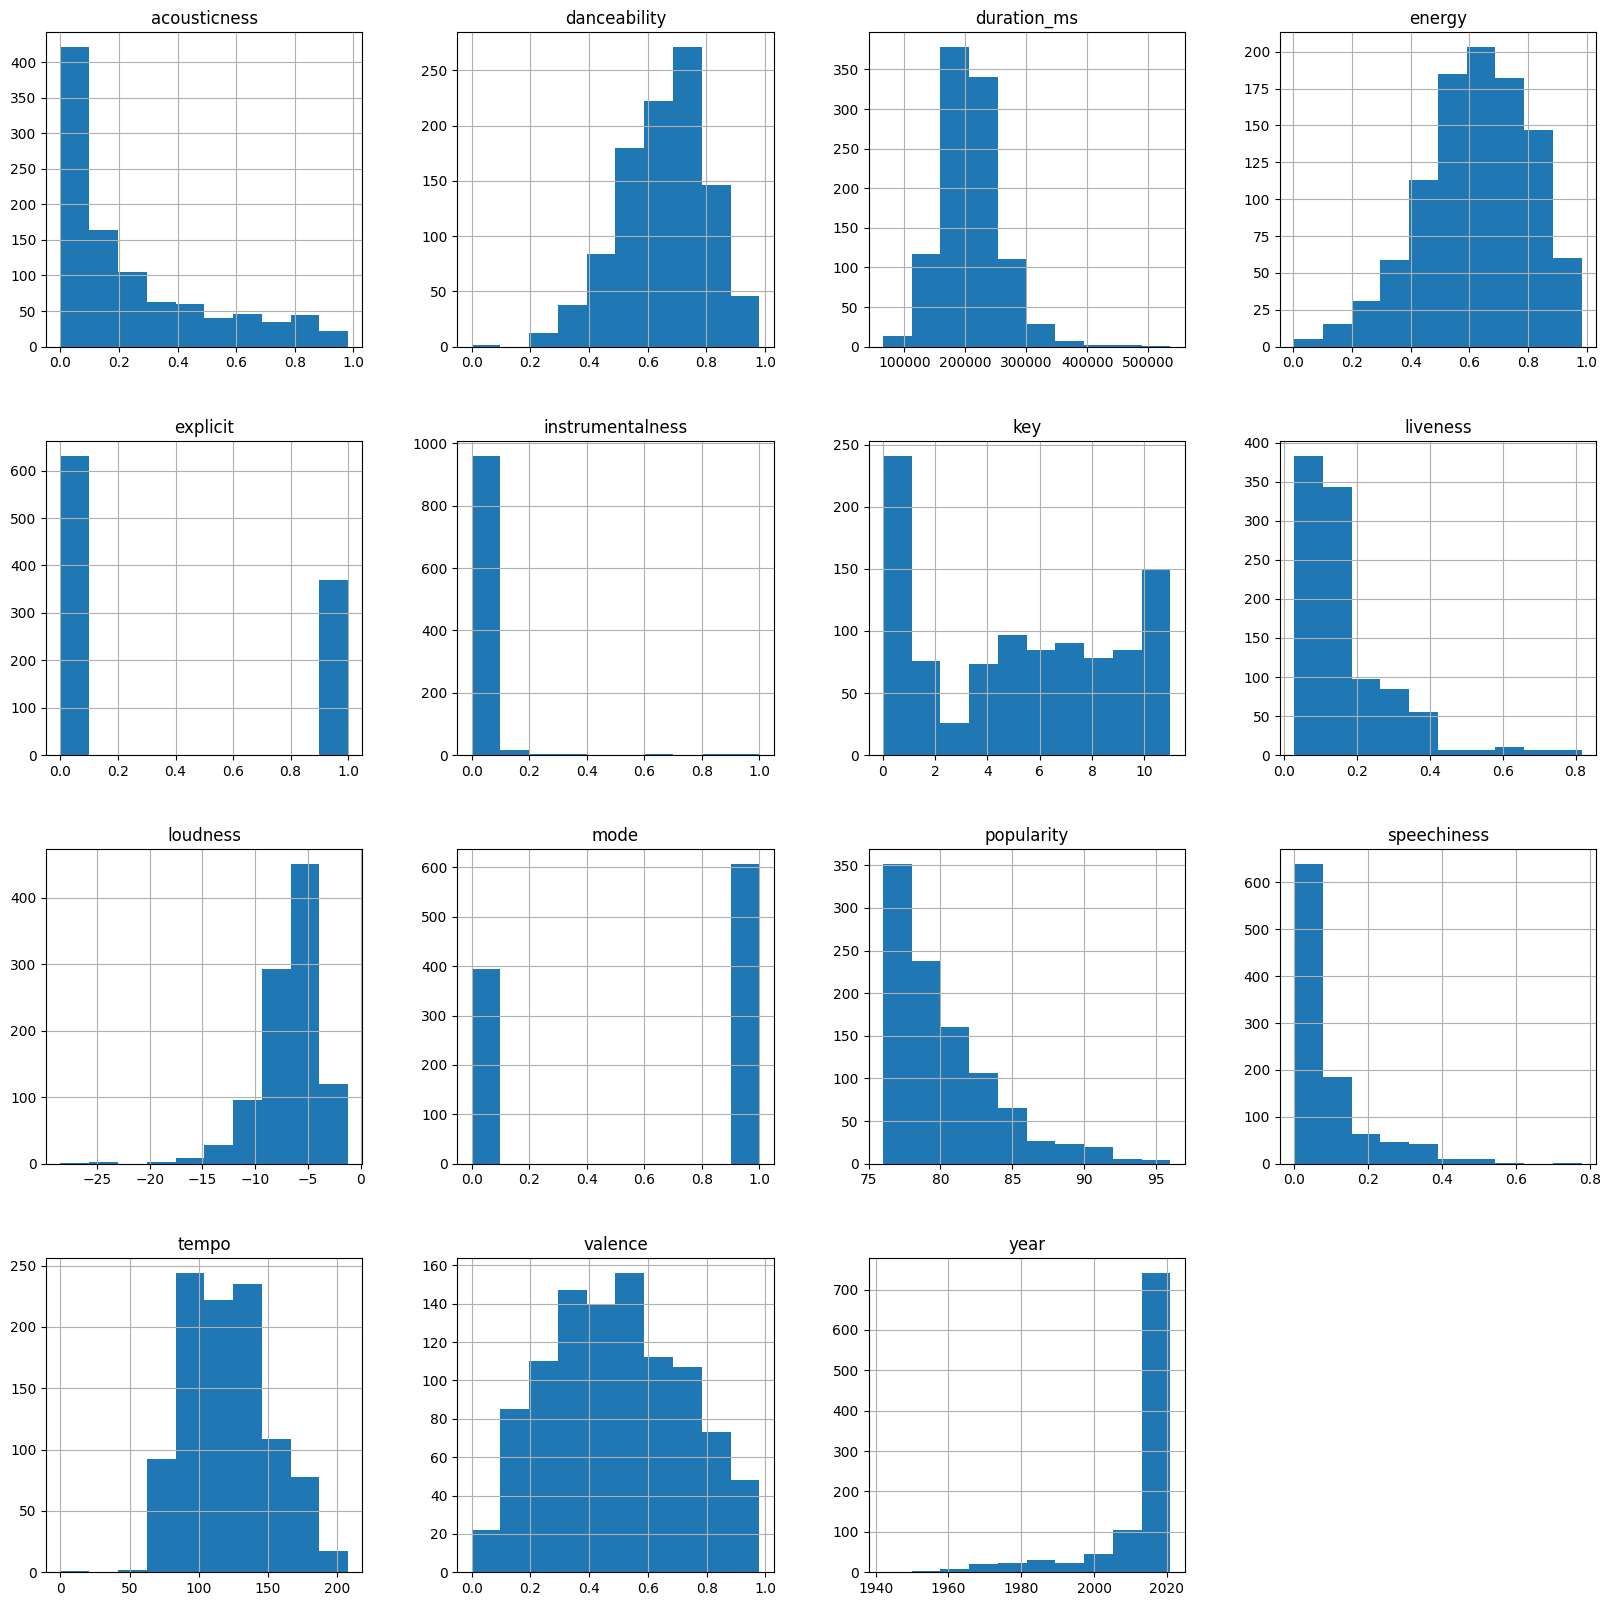

In [215]:
trend_data.hist(figsize=(20, 20))
plt.show()

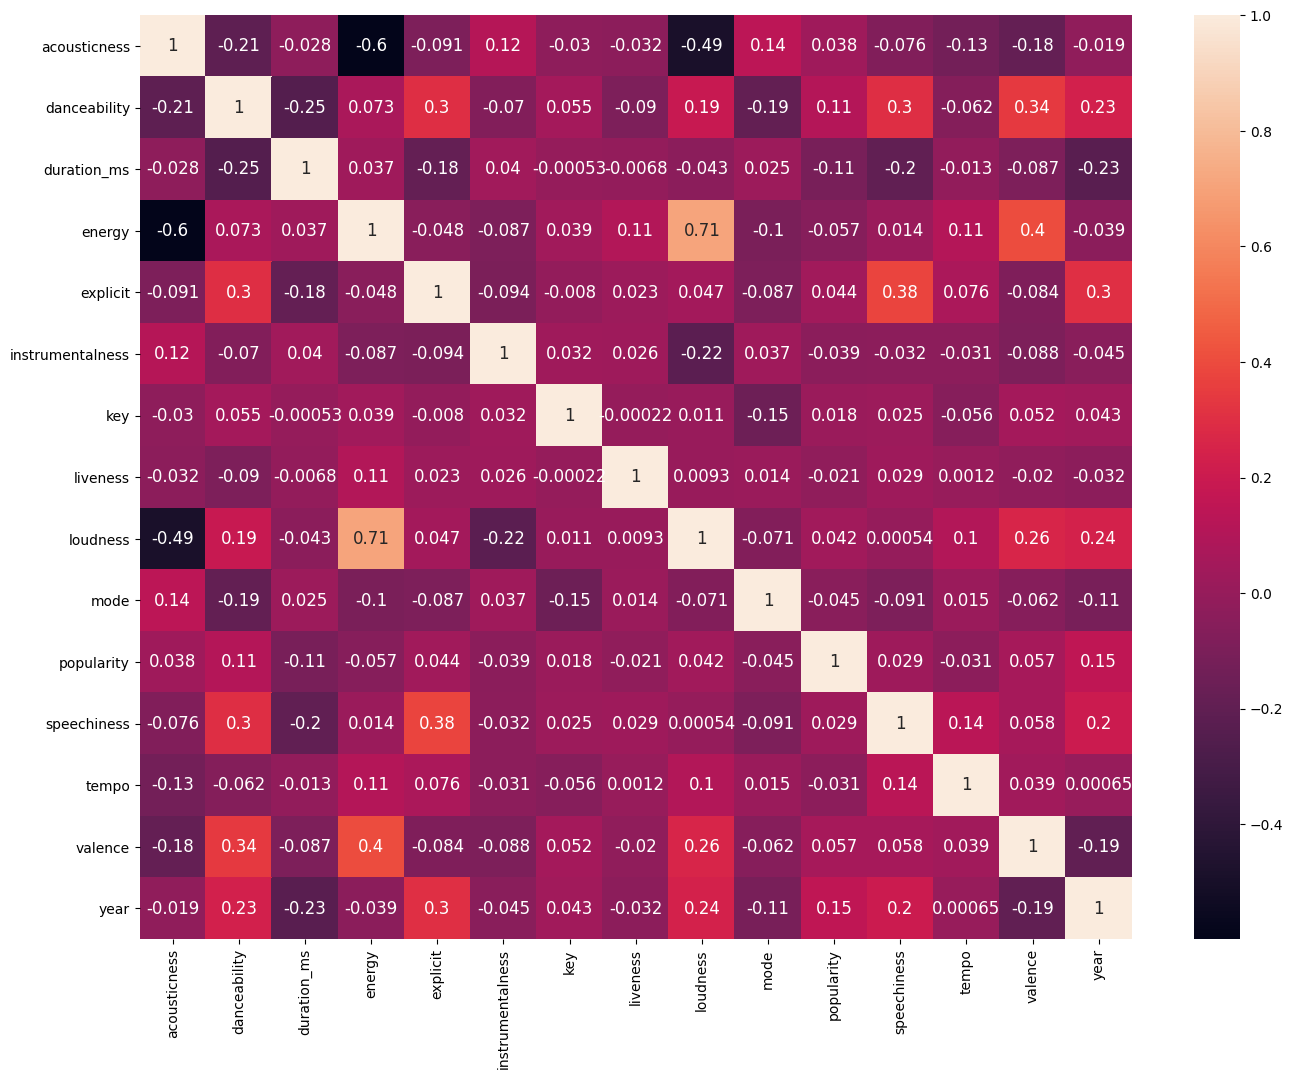

In [216]:
plt.figure(figsize=(16, 12))
trend_corr = trend_data.corr()
CM = sns.heatmap(trend_corr,annot=True,annot_kws={"size": 12})
plt.show()

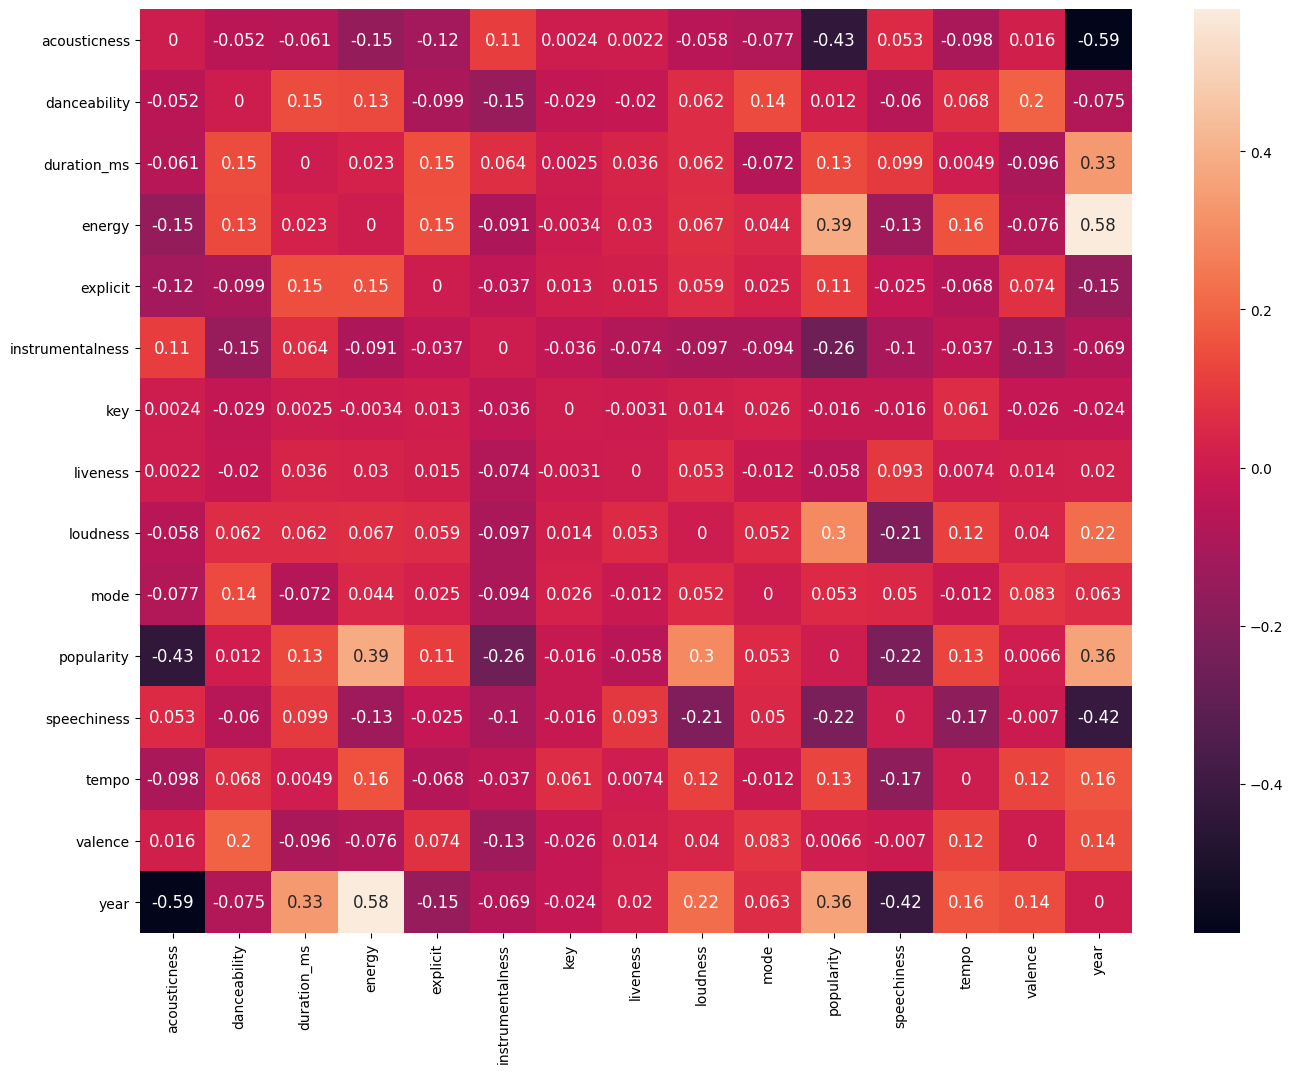

In [217]:
plt.figure(figsize=(16, 12))
trend_corr = trend_data.corr()
corr_change = corr-trend_corr
CM = sns.heatmap(corr_change,annot=True,annot_kws={"size": 12})
plt.show()

In [218]:
#todays date to use as reference point for all dates
from datetime import datetime
today_date = datetime(2021,4,1)
print(today_date)

2021-04-01 00:00:00


In [219]:
# Check for duplicate song names
your_list = list(trend_data['name'])
print("Duplicates song names?: {0}".format(len(your_list) != len(set(your_list))))

Duplicates song names?: True


In [249]:
kw_list = your_list[0:5] # build search item list (5 at a time limit)
# build payload and specify keywords, no category, all time from 2004 forward and US region
pytrends.build_payload(kw_list, cat=None, timeframe='all', geo='US')
# Pull the interest over time data (one of many possible requests like trending, top charts, suggestions)
google_trends = pytrends.interest_over_time()


100
0
0
7
1


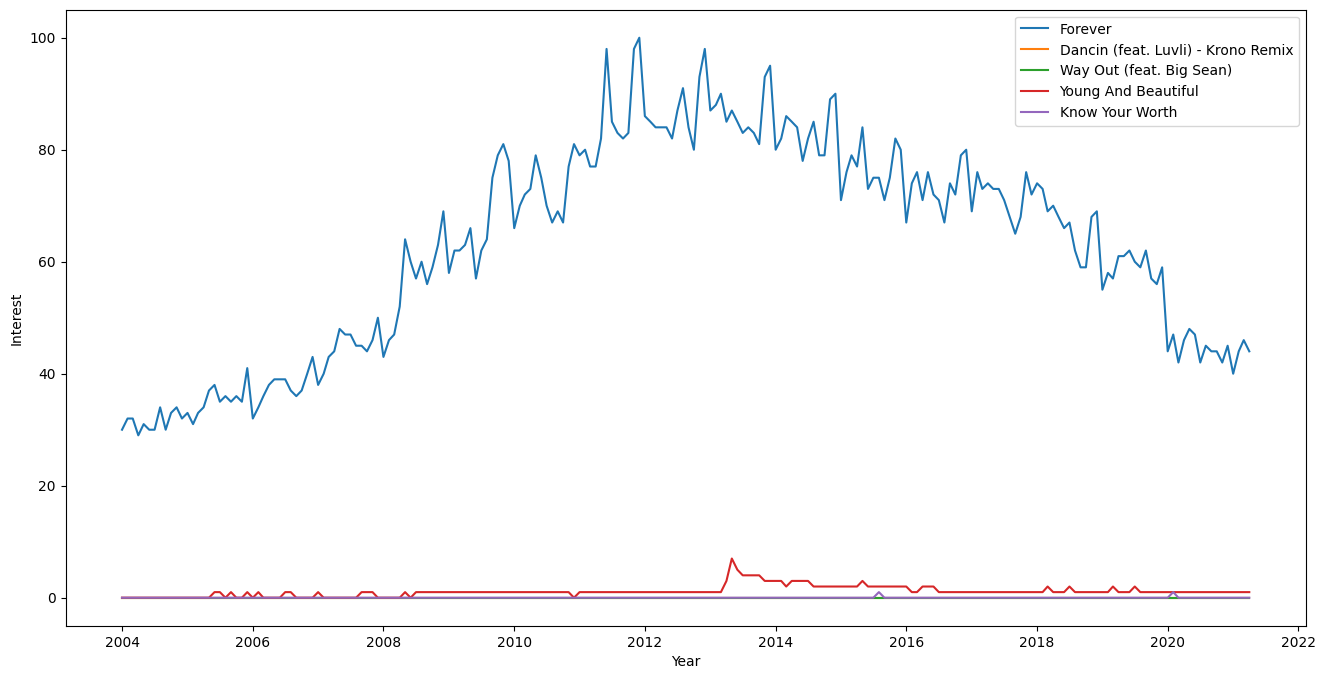

In [250]:
time = google_trends.index
plt.figure(figsize=(16, 8))
for item in kw_list:
    plt.plot(time,google_trends["{0}".format(item)])
    print(max(google_trends["{0}".format(item)]))
plt.xlabel('Year')
plt.ylabel('Interest')
plt.legend(kw_list)
plt.show()

Using song name will be difficult since many song names are complex and therefore they are not typically searched for using Google. Other song names are searched, not because they are looking for the song, but because the song has a generic name that is a common term.

In [251]:
def find_max_date(time, trend_info,today_date):
    if max(trend_info)==0:
        time_delta=None
    else:
        max_index = list(trend_info).index(max(trend_info))
        max_time = list(time)[max_index]
        time_delta = (today_date-max_time).total_seconds()
    return time_delta

In [252]:
trend_info = google_trends["Young And Beautiful"]
print(find_max_date(time,trend_info,today_date))
trend_info = google_trends["Dancin (feat. Luvli) - Krono Remix"]
print(find_max_date(time,trend_info,today_date))

249868800.0
None


In [261]:
trend_data['Max Search Time Delta'] = None

Collect the time date from Google trends and add to dataframe. It should be noted that the Google trends information will change if the notebook is reran. This is because Google is constantly updating the trends information. 

In [267]:
%%time
count=0
for index, row in trend_data.iterrows():
    if row['Max Search Time Delta']==None and index>biggest_index:
        song = str(row['name'])
        word_list = [song]
        pytrends.build_payload(word_list, cat=None, timeframe='all', geo='US')
        google_trends = pytrends.interest_over_time()
        if google_trends.empty==False:
            time=google_trends.index
            trend_info = google_trends[song]
            trend_data.iat[index,19]=find_max_date(time,trend_info,today_date)

CPU times: user 1min 51s, sys: 2.64 s, total: 1min 54s
Wall time: 37min 44s


These two cells get reran to go through all 1000 rows, rate limit gets exceed so you update to the last filled value

In [277]:
count=0
for i,val in enumerate(trend_data['Max Search Time Delta']):
    if val!=None:
        biggest_index = i
        count+=1
print('Percent of data that has non-zero value: {0:.2f}'.format(count/1000))
print(biggest_index)

Percent of data that has non-zero value: 0.77
999


In [270]:
#save new data to csv file
trend_data.to_csv('Trending_data.csv', encoding='utf-8', index=False)

Now that we've pulled the relevant data from Google trends we will clear the songs from the dataframe that had 0 searches and resulted in a Null value for the peak time.

In [273]:
trend_time_data = trend_data.copy()

In [282]:
df = trend_time_data[~trend_time_data['Max Search Time Delta'].isnull()]

In [290]:
df.reset_index(drop=True, inplace=True)
unwanted = ['key','mode','explicit','id','artists','name','release_date']
df = df.drop(columns=unwanted)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acousticness           770 non-null    float64
 1   danceability           770 non-null    float64
 2   duration_ms            770 non-null    int64  
 3   energy                 770 non-null    float64
 4   instrumentalness       770 non-null    float64
 5   liveness               770 non-null    float64
 6   loudness               770 non-null    float64
 7   popularity             770 non-null    int64  
 8   speechiness            770 non-null    float64
 9   tempo                  770 non-null    float64
 10  valence                770 non-null    float64
 11  year                   770 non-null    int64  
 12  Max Search Time Delta  770 non-null    object 
dtypes: float64(9), int64(3), object(1)
memory usage: 78.3+ KB


In [292]:
display(df)

acousticness  danceability  duration_ms  energy  instrumentalness  \
0        0.678000         0.613       108696   0.339          0.000000   
1        0.262000         0.324       236053   0.416          0.000037   
2        0.145000         0.790       181436   0.694          0.002520   
3        0.047800         0.658       210520   0.901          0.000000   
4        0.039500         0.837       288624   0.636          0.001250   
..            ...           ...          ...     ...               ...   
765      0.132000         0.817       245640   0.599          0.000311   
766      0.086100         0.685       163084   0.848          0.000007   
767      0.000329         0.534       215160   0.870          0.000000   
768      0.538000         0.532       261923   0.623          0.000073   
769      0.062200         0.548       297787   0.847          0.000000   

     liveness  loudness  popularity  speechiness    tempo  valence  year  \
0      0.1660   -14.908          77       0.1350  106.582    0.292  2019   
1      0.1100    -8.920          78       0.0368  113.986    0.151  2013   
2      0.2810    -7.726          80       0.0708  103.007    0.508  2020   
3      0.1200    -2.814          76       0.0357   93.979    0.708  2019   
4      0.3420    -7.643          78       0.0860  145.972    0.274  2018   
..        ...       ...         ...          ...      ...      ...   ...   
765    0.0873    -9.249          76       0.0328  108.873    0.548  1985   
766    0.0783    -4.561          81       0.0858  179.870    0.761  2020   
767    0.2410    -3.078          76       0.0425  126.019    0.462  2008   
768    0.0925    -9.208          77       0.0331   89.937    0.403  2020   
769    0.0816    -3.237          83       0.1860  171.447    0.100  2002   

    Max Search Time Delta  
0             2.94538e+08  
1             2.49869e+08  
2               3.672e+07  
3             4.46688e+07  
4              5.0976e+06  
..                    ...  
765           5.23238e+08  
766            2.6784e+06  
767           1.83168e+07  
768            1.1569e+08  
769           3.60202e+08  

[770 rows x 13 columns]

In [294]:
features = [ col for col in df.columns if col!='Max Search Time Delta']

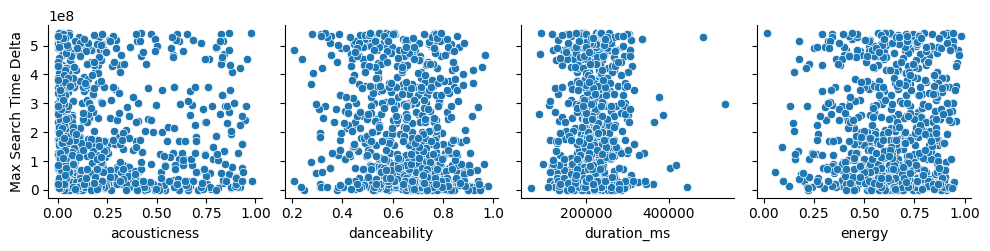

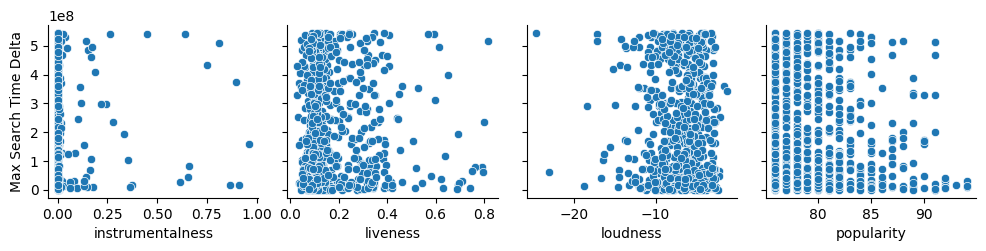

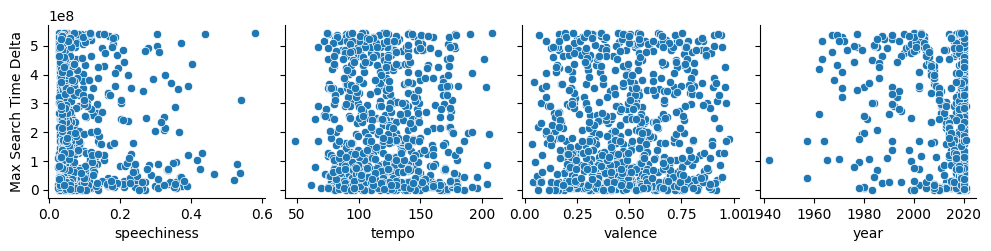

In [302]:
pp = sns.pairplot(data=df,x_vars=features[0:4],y_vars=['Max Search Time Delta'])
pp2 = sns.pairplot(data=df,x_vars=features[4:8],y_vars=['Max Search Time Delta'])
pp2 = sns.pairplot(data=df,x_vars=features[8:13],y_vars=['Max Search Time Delta'])
plt.show()


In [305]:
x = list(df['Max Search Time Delta'])
y = list(df['popularity'])


Perform a linear fit to see if the peak search date correlates with the popularity reported by Spotify.

Least squares method will be used and summarized by R^2 

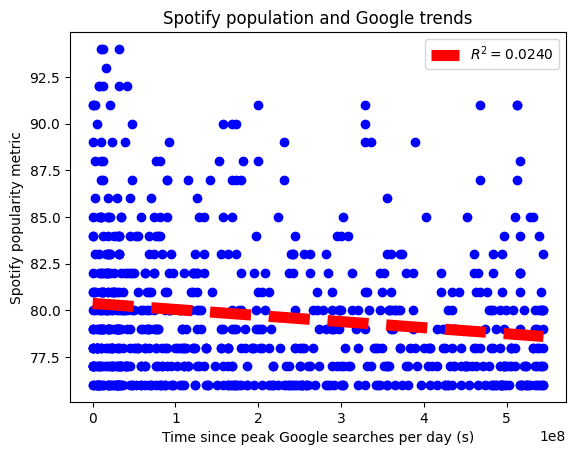

In [310]:
from scipy.stats import pearsonr
z = np.polyfit(x, y, 1)
f = np.poly1d(z)
R2 = pearsonr(x, y)
R2 = R2[0]**2
plt.plot(x,y,'o',color='blue')
domain=np.linspace(min(x),max(x),1000)
plt.plot(domain,f(domain),'--',color='red',label='$R^2 = {0:.4f}$'.format(R2),linewidth=8)
plt.title('Spotify population and Google trends')
plt.xlabel('Time since peak Google searches per day (s)')
plt.ylabel('Spotify popularity metric')
plt.legend()
plt.show()

# Pearson and Spearman Corr tests for Google search to  Spotify metric (A)

In [14]:
TD = pd.read_csv('Trending_data.csv')

In [18]:
TD = TD.dropna()

In [19]:
TD

acousticness                   artists  danceability  duration_ms  \
0        0.678000              ['ilyTOMMY']         0.613       108696   
3        0.262000          ['Lana Del Rey']         0.324       236053   
4        0.145000  ['Khalid', 'Disclosure']         0.790       181436   
5        0.047800          ['Daddy Yankee']         0.658       210520   
6        0.039500             ['21 Savage']         0.837       288624   
..            ...                       ...           ...          ...   
993      0.132000              ['Survivor']         0.817       245640   
994      0.086100             ['Bad Bunny']         0.685       163084   
995      0.000329                  ['P!nk']         0.534       215160   
996      0.538000          ['Taylor Swift']         0.532       261923   
999      0.062200   ['Eminem', 'Nate Dogg']         0.548       297787   

     energy  explicit                      id  instrumentalness  key  \
0     0.339         0  7uHRKSQ9WIlBBuBY7BHcbq          0.000000    5   
3     0.416         0  2nMeu6UenVvwUktBCpLMK9          0.000037   11   
4     0.694         0  0TrPqhAMoaKUFLR7iYDokf          0.002520    9   
5     0.901         0  6RyaV7owmVU6fzEPE17sF1          0.000000    7   
6     0.636         1  2t8yVaLvJ0RenpXUIAC52d          0.001250    1   
..      ...       ...                     ...               ...  ...   
993   0.599         0  2KH16WveTQWT6KOG9Rg6e2          0.000311    0   
994   0.848         1  6NfrH0ANGmgBXyxgV2PeXt          0.000007    8   
995   0.870         1  0JiY190vktuhSGN6aqJdrt          0.000000   11   
996   0.623         0  3hUxzQpSfdDqwM3ZTFQY0K          0.000073    5   
999   0.847         1  4xkOaSrkexMciUUogZKVTS          0.000000    1   

     liveness  loudness  mode                 name  popularity release_date  \
0      0.1660   -14.908     0              Forever          77   2019-03-08   
3      0.1100    -8.920     0  Young And Beautiful          78   2013-01-01   
4      0.2810    -7.726     0      Know Your Worth          80   2020-02-04   
5      0.1200    -2.814     1    Que Tire Pa Lante          76   2019-10-18   
6      0.3420    -7.643     1                a lot          78   2018-12-21   
..        ...       ...   ...                  ...         ...          ...   
993    0.0873    -9.249     0     Eye of the Tiger          76         1985   
994    0.0783    -4.561     0           La Difícil          81   2020-02-28   
995    0.2410    -3.078     0              So What          76   2008-10-24   
996    0.0925    -9.208     1               august          77   2020-07-24   
999    0.0816    -3.237     1     'Till I Collapse          83   2002-05-26   

     speechiness    tempo  valence  year  Max Search Time Delta  
0         0.1350  106.582    0.292  2019            294537600.0  
3         0.0368  113.986    0.151  2013            249868800.0  
4         0.0708  103.007    0.508  2020             36720000.0  
5         0.0357   93.979    0.708  2019             44668800.0  
6         0.0860  145.972    0.274  2018              5097600.0  
..           ...      ...      ...   ...                    ...  
993       0.0328  108.873    0.548  1985            523238400.0  
994       0.0858  179.870    0.761  2020              2678400.0  
995       0.0425  126.019    0.462  2008             18316800.0  
996       0.0331   89.937    0.403  2020            115689600.0  
999       0.1860  171.447    0.100  2002            360201600.0  

[770 rows x 20 columns]

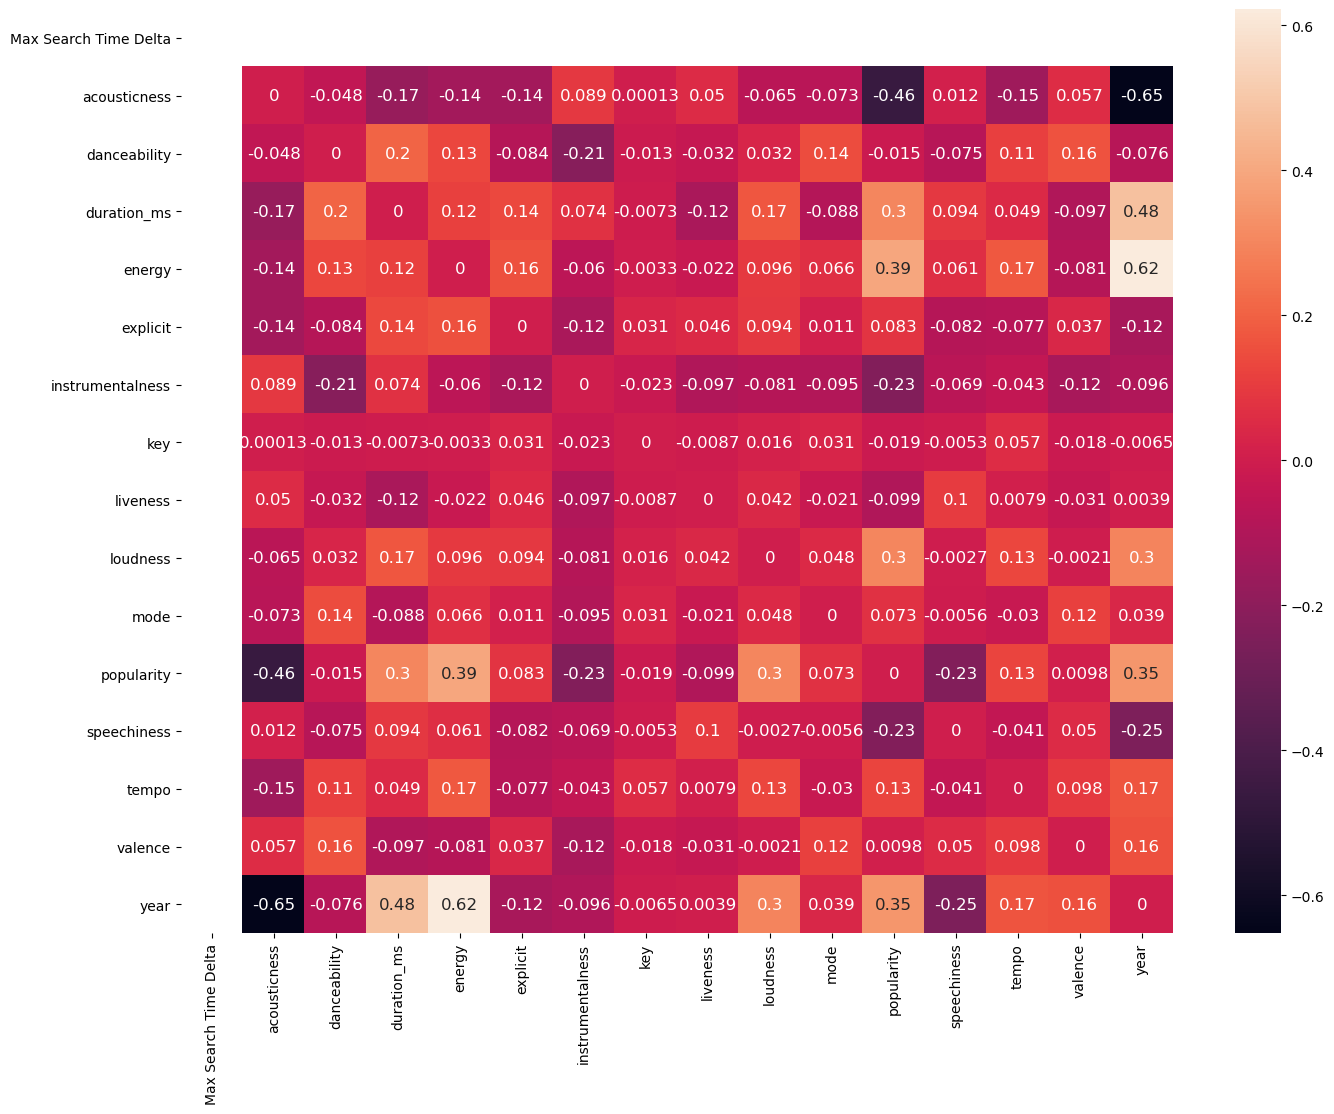

acousticness  danceability  duration_ms    energy  \
acousticness               1.000000     -0.180264    -0.050631 -0.625712   
danceability              -0.180264      1.000000    -0.268066  0.068106   
duration_ms               -0.050631     -0.268066     1.000000  0.063174   
energy                    -0.625712      0.068106     0.063174  1.000000   
explicit                  -0.060722      0.287637    -0.169608 -0.053771   
instrumentalness           0.104861     -0.023697     0.063159 -0.071292   
key                       -0.026759      0.037381     0.011498  0.038411   
liveness                  -0.038692     -0.096688     0.027985  0.094427   
loudness                  -0.520409      0.171680    -0.035028  0.716679   
mode                       0.134904     -0.194300     0.016980 -0.121281   
popularity                 0.062334      0.115277    -0.116350 -0.055176   
speechiness               -0.066859      0.325792    -0.203716  0.043116   
tempo                     -0.109099     -0.088162    -0.022581  0.112793   
valence                   -0.196762      0.353388    -0.097676  0.418072   
year                       0.023440      0.239367    -0.219898 -0.075123   
Max Search Time Delta     -0.043448     -0.157384     0.120936  0.041558   

                       explicit  instrumentalness       key  liveness  \
acousticness          -0.060722          0.104861 -0.026759 -0.038692   
danceability           0.287637         -0.023697  0.037381 -0.096688   
duration_ms           -0.169608          0.063159  0.011498  0.027985   
energy                -0.053771         -0.071292  0.038411  0.094427   
explicit               1.000000         -0.086867 -0.026437  0.007343   
instrumentalness      -0.086867          1.000000  0.019531  0.032161   
key                   -0.026437          0.019531  1.000000  0.001455   
liveness               0.007343          0.032161  0.001455  1.000000   
loudness               0.032755         -0.169594  0.010054 -0.011407   
mode                  -0.073540          0.030690 -0.156291  0.022903   
popularity             0.040024         -0.055023  0.020687 -0.008145   
speechiness            0.381169         -0.008927  0.036578  0.017757   
tempo                  0.077979          0.006265 -0.051495 -0.012534   
valence               -0.049402         -0.075773  0.042897  0.017742   
year                   0.280784         -0.029544  0.025843 -0.083923   
Max Search Time Delta -0.150855          0.027558  0.015455 -0.003275   

                       loudness      mode  popularity  speechiness     tempo  \
acousticness          -0.520409  0.134904    0.062334    -0.066859 -0.109099   
danceability           0.171680 -0.194300    0.115277     0.325792 -0.088162   
duration_ms           -0.035028  0.016980   -0.116350    -0.203716 -0.022581   
energy                 0.716679 -0.121281   -0.055176     0.043116  0.112793   
explicit               0.032755 -0.073540    0.040024     0.381169  0.077979   
instrumentalness      -0.169594  0.030690   -0.055023    -0.008927  0.006265   
key                    0.010054 -0.156291    0.020687     0.036578 -0.051495   
liveness              -0.011407  0.022903   -0.008145     0.017757 -0.012534   
loudness               1.000000 -0.079759    0.051128     0.014879  0.094239   
mode                  -0.079759  1.000000   -0.059014    -0.088278  0.026675   
popularity             0.051128 -0.059014    1.000000     0.053933 -0.034673   
speechiness            0.014879 -0.088278    0.053933     1.000000  0.119201   
tempo                  0.094239  0.026675   -0.034673     0.119201  1.000000   
valence                0.263483 -0.098077    0.055241     0.081259  0.061067   
year                   0.216774 -0.089133    0.160304     0.180726  0.010845   
Max Search Time Delta -0.085617  0.054916   -0.155032    -0.075720 -0.027166   

                        valence      year  Max Search Time Delta  
acousticness          -0.196762  0.023440              -0.04

In [20]:
plt.figure(figsize=(16, 12))
trend_corr = TD.corr()
corr_change = corr-trend_corr
CM = sns.heatmap(corr_change,annot=True,annot_kws={"size": 12})
plt.show()
trend_corr

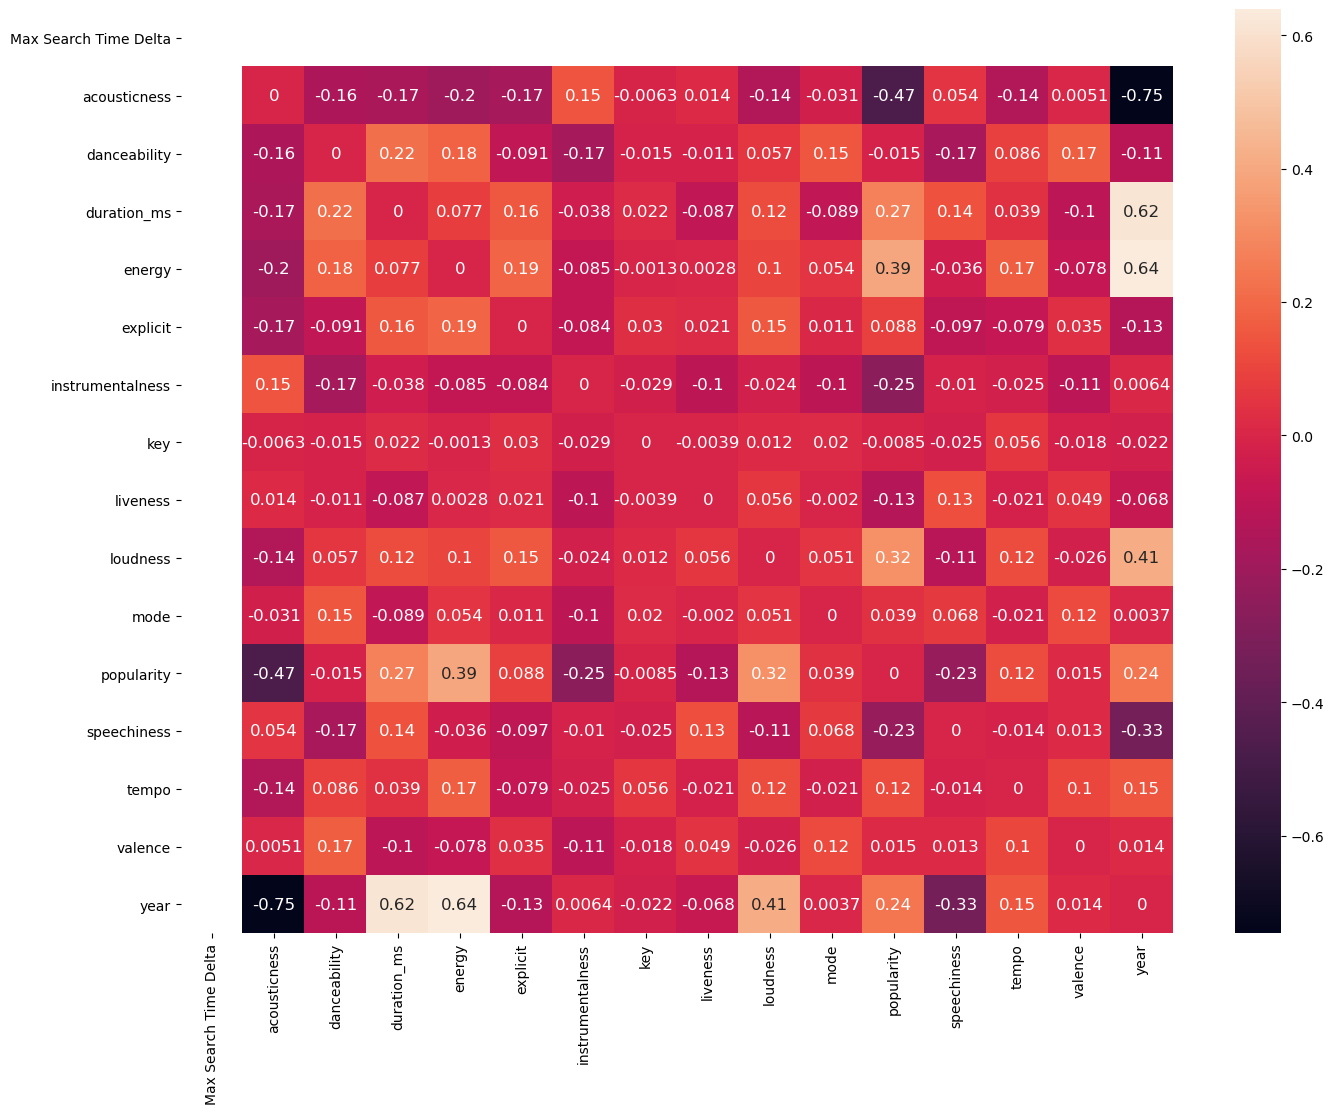

acousticness  danceability  duration_ms    energy  \
acousticness               1.000000     -0.072245    -0.058777 -0.557709   
danceability              -0.072245      1.000000    -0.280705  0.016700   
duration_ms               -0.058777     -0.280705     1.000000  0.101677   
energy                    -0.557709      0.016700     0.101677  1.000000   
explicit                  -0.022374      0.293748    -0.190120 -0.088087   
instrumentalness           0.048218     -0.065759     0.175210 -0.046786   
key                       -0.020362      0.039665    -0.017699  0.036389   
liveness                  -0.002933     -0.117778    -0.002046  0.070086   
loudness                  -0.447594      0.146666     0.016318  0.709737   
mode                       0.092592     -0.198958     0.017834 -0.108749   
popularity                 0.069750      0.115257    -0.089550 -0.053370   
speechiness               -0.108602      0.419628    -0.247668  0.139271   
tempo                     -0.121760     -0.064236    -0.012291  0.118360   
valence                   -0.144869      0.347537    -0.090816  0.414400   
year                       0.117623      0.275749    -0.356499 -0.092436   
Max Search Time Delta     -0.077269     -0.145885     0.142257  0.040425   

                       explicit  instrumentalness       key  liveness  \
acousticness          -0.022374          0.048218 -0.020362 -0.002933   
danceability           0.293748         -0.065759  0.039665 -0.117778   
duration_ms           -0.190120          0.175210 -0.017699 -0.002046   
energy                -0.088087         -0.046786  0.036389  0.070086   
explicit               1.000000         -0.120020 -0.024875  0.032308   
instrumentalness      -0.120020          1.000000  0.024896  0.035967   
key                   -0.024875          0.024896  1.000000 -0.003362   
liveness               0.032308          0.035967 -0.003362  1.000000   
loudness              -0.027241         -0.227093  0.014250 -0.025141   
mode                  -0.073540          0.036580 -0.145445  0.003759   
popularity             0.035059         -0.031861  0.009975  0.019350   
speechiness            0.396227         -0.067885  0.056495 -0.012073   
tempo                  0.079138         -0.011466 -0.050237  0.016098   
valence               -0.047259         -0.089683  0.043669 -0.062549   
year                   0.283762         -0.131967  0.040915 -0.011958   
Max Search Time Delta -0.146799          0.033344  0.008111  0.029531   

                       loudness      mode  popularity  speechiness     tempo  \
acousticness          -0.447594  0.092592    0.069750    -0.108602 -0.121760   
danceability           0.146666 -0.198958    0.115257     0.419628 -0.064236   
duration_ms            0.016318  0.017834   -0.089550    -0.247668 -0.012291   
energy                 0.709737 -0.108749   -0.053370     0.139271  0.118360   
explicit              -0.027241 -0.073540    0.035059     0.396227  0.079138   
instrumentalness      -0.227093  0.036580   -0.031861    -0.067885 -0.011466   
key                    0.014250 -0.145445    0.009975     0.056495 -0.050237   
liveness              -0.025141  0.003759    0.019350    -0.012073  0.016098   
loudness               1.000000 -0.082245    0.027312     0.126099  0.102229   
mode                  -0.082245  1.000000   -0.024650    -0.162137  0.017840   
popularity             0.027312 -0.024650    1.000000     0.049460 -0.026172   
speechiness            0.126099 -0.162137    0.049460     1.000000  0.092416   
tempo                  0.102229  0.017840   -0.026172     0.092416  1.000000   
valence                0.287608 -0.097533    0.050383     0.118166  0.054390   
year                   0.101655 -0.054139    0.263834     0.266296  0.031965   
Max Search Time Delta -0.082455  0.048771   -0.160319    -0.090880 -0.038358   

                        valence      year  Max Search Time Delta  
acousticness          -0.144869  0.117623              -0.07

In [21]:
plt.figure(figsize=(16, 12))
trend_corr = TD.corr(method = 'spearman')
corr_change = corr-trend_corr
CM = sns.heatmap(corr_change,annot=True,annot_kws={"size": 12})
plt.show()
trend_corr